(returns)=

# Returnanalyse 



```note
1. Returns und Renditen und deren statistische Auswertung
2. Portfoliowerte und Portfoliorenditen 

to do: 
* siehe Beispiel-Code: finance-pandas.ipynb
* Wiederholung wichtiger Pandas Grundlagen: Index als Datum anstalt Spalte und Umwandlung, sowie von Pandas vorgegebene Funktionen wie `plot()` oder `pct_change()` usw.) und als Übungsaufgabe -- erledigt
* mit aktuellen Datensatz mit einigen DAX-Aktien von oben / csv  -- erledigt
* Renditen vs. Returns -- Berechnung mit Hilfsfunktionen vs. eigene Berechnungen -- erledigt
* Portfoliowert und Rendite -- in Arbeit
* Berechnung empirischer Kennzahlen: mean, var, std, skewness, kurtosis... -- für Returns erledigt
* Portfoliovarianz
* einfache Grafiken: Zeitreihen, Hist, Scatterplots ... -- erledigt
* statistische Tests auf Normalverteilung... -- to do!!!
* Kovarianzmatrix / Korrelationsmatrix für Zusammenhang -- erledigt
* evt. in Anhang aufnehmen Grundlagen statistisches Testen und Arbeiten mit verschiedenen Verteilungen??? sowie multivariate Normalverteilung???
```


Zur Einschätzung der Entwicklung von Portfolien oder Aktienkursen betrachtet man nicht die Aktienkurse selbst, sondern deren Renditen bzw. Returns. Hierzu gibt es verschiedene Definitionen, die teilweise nicht einheitlich verwendet werden. Daher wollen wir Beginn die verschiedenen Renditedefinitionen nochmals aufgreifen. Zunächst betrachten wir nur einzelne Werte, egal ob Aktien oder andere Finanzprodukte und bezeichnen den Kurs zum Zeitpunkt $t$ mit $S_t$ und uns interessiert die Wertentwicklung der Aktie vom Anfangszeitpunkt $a$ nach $t$.

## Rendite vs. Log-Returns

👉 **Renditen** beschreiben den prozentualer Wertzuwachs von $a$ nach $t$: 
 
 $$
 R_{a,t} = \frac{S_{t} - S_{a}}{S_a}= \frac{S_t}{S_a}-1 
 $$

und werden auch als diskrete oder arithmetische Returns bezeichnet.
In der Finanzmathematik arbeitet man hingegen häufig mit den **Log-Returns**: 

$$
r_{a,t} = \log{\left( \frac{S_t}{S_a} \right)} = 
  \log {\left(S_t \right)} - \log {\left(S_a \right)},
$$

die teilweise auch als stetige oder geometrische Returns bezeichnet werden 
Wir werden gleich an einem realen Beispiel sehen, dass sich beide Renditebegriffe nur minimal unterscheiden, wobei mit 

$$
R_{a,t}=e^{r_{a,t}}-1 \Leftrightarrow r_{a,t} = \log{\left( R_{a,t}+1\right)}
$$ (rendite-vs-log-returns)

beide einfach ineinander umgerechnet werden können.

Das folgende Beispiel zeigt die Berechnung der täglichen Returns:

In [76]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Daten von Yahoo-Finance abrufen
ticker = "ALV.DE"
start_date = datetime(year = 2024, month=1, day = 1)


print("Versuche Yahoo Finance für %s:\n" % (ticker))
try:
    data = yf.download(ticker, start = start_date, group_by='ticker')
except Exception as e:
    print("Fehler bei Yahoo Daten Download: %s \n" % (e))

if not data.empty:
    data
    print(data.head())
    print(data.tail())
else: 
    print("Probleme bey yfiancne Download von %s" % ticker)

Versuche Yahoo Finance für ALV.DE:



/tmp/ipykernel_32269/1206153666.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start = start_date, group_by='ticker')
[*********************100%***********************]  1 of 1 completed

Ticker          ALV.DE                                            
Price             Open        High         Low       Close  Volume
Date                                                              
2024-01-02  221.062945  224.475815  220.880928  222.928650  778095
2024-01-03  224.339302  225.021876  220.061841  220.744415  686416
2024-01-04  221.244983  223.429214  221.199476  223.429214  545050
2024-01-05  222.109576  222.974167  220.198363  221.973053  634842
2024-01-08  221.927555  222.928655  220.334882  222.564621  437610
Ticker          ALV.DE                                             
Price             Open        High         Low       Close   Volume
Date                                                               
2025-09-16  354.000000  355.000000  346.600006  346.600006   654647
2025-09-17  347.100006  348.100006  343.200012  344.500000   644467
2025-09-18  345.700012  347.899994  344.899994  347.200012   398350
2025-09-19  347.799988  349.600006  346.100006  347.5000

In [77]:
df = data["ALV.DE"]
#Datum aus Index in Spalte holen: 
#   nur zur Demonstration, ist hier nicht von Belang ob Date als Index oder Spalte!
df = df.reset_index()
df2 = df[["Date", "Close"]].copy()
print(df2.head())

Price       Date       Close
0     2024-01-02  222.928650
1     2024-01-03  220.744415
2     2024-01-04  223.429214
3     2024-01-05  221.973053
4     2024-01-08  222.564621


Verschiedene Methoden zur Berechnung beider Renditen:

In [78]:
df2["Rendite"] = df2["Close"].pct_change()
df2['LogReturn'] = np.log(df2['Close']).diff()   # = log(C_t) - log(C_{t-1})
#nur zum Vergleich alternative Berechnungsformeln, die natürlich identische Werte liefern!
df2['Rendite2'] = df2['Close'] / df2['Close'].shift(1) - 1 
df2["LogReturn2"] = np.log(df2["Close"] / df2["Close"].shift(1))
df2["LogReturn3"] = np.log(df2['Rendite2'] +1)
print(df2.head())


Price       Date       Close   Rendite  LogReturn  Rendite2  LogReturn2  \
0     2024-01-02  222.928650       NaN        NaN       NaN         NaN   
1     2024-01-03  220.744415 -0.009798  -0.009846 -0.009798   -0.009846   
2     2024-01-04  223.429214  0.012162   0.012089  0.012162    0.012089   
3     2024-01-05  221.973053 -0.006517  -0.006539 -0.006517   -0.006539   
4     2024-01-08  222.564621  0.002665   0.002661  0.002665    0.002661   

Price  LogReturn3  
0             NaN  
1       -0.009846  
2        0.012089  
3       -0.006539  
4        0.002661  


Offensichtlich sind die Spalten Rendite und Rendite2 sowie die drei verschieden berechneten Log-Returns gleich. Mittels `plot()` können wir den zeitlichen Verlauf darstellen. Da die Schlusskurse und die Renditen völlig verschiedene Wertebereiche haben, ist ein simpler Plot aller Zeitreihen nicht sinnvoll, so dass wir zuvor noch die Schluss-Kurse entfernen. Probieren Sie zum Vergleich einfach mal den folgenden Befehl:

<Axes: >

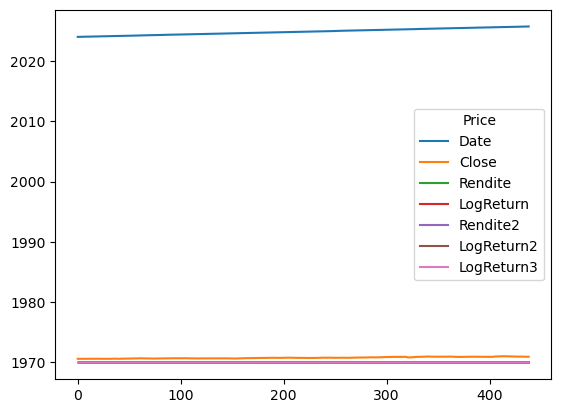

In [79]:
df2.plot()

Price        Rendite  LogReturn  Rendite2  LogReturn2  LogReturn3
Date                                                             
2024-01-03 -0.009798  -0.009846 -0.009798   -0.009846   -0.009846
2024-01-04  0.012162   0.012089  0.012162    0.012089    0.012089
2024-01-05 -0.006517  -0.006539 -0.006517   -0.006539   -0.006539
2024-01-08  0.002665   0.002661  0.002665    0.002661    0.002661
2024-01-09 -0.004089  -0.004098 -0.004089   -0.004098   -0.004098


<Axes: xlabel='Date'>

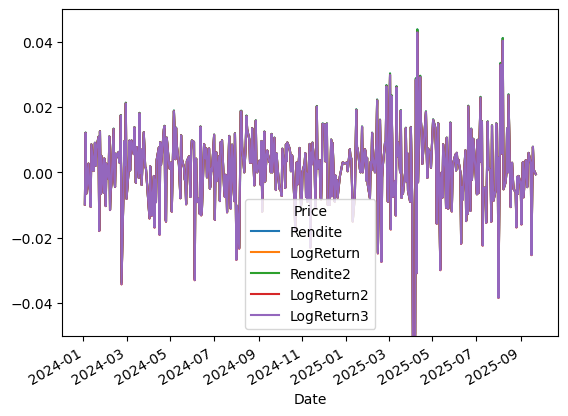

In [80]:
#Entfernen der Closing-Kurse
df3 = df2.drop(columns="Close").dropna().copy()
#Durch Indexierung des Datums steht dieses autoamtisch auf der x-Achse, sonst der Integer-Index 0,1,2,..
df3 = df3.set_index("Date")

#plot aller Renditen
print(df3.head())
df3.plot(ylim=(-0.05,0.05))


**Hinweis**: die Pandas Methode `pct_change()` kann auch auf den kompletten DataFrame angewendet werden, solange das Datum als Index gesetzt ist. Dann werden die prozentualen Veränderungen auch für die Open, High und Low-Kurse berechnet. Ist das Datum allerdings als Spalte gesetzt, so führt der Aufruf zu einer Fehlermeldung, da die Funktion `pct_change()` nicht auf das Dates-Format angewendet werden kann. Außerdem werden die normalen Kurse überschrieben -- möchte man beispielsweise die Closing-Kurse im DataFrame erhalten, sollte wie oben in df2 einfach eine neue Variable / Spalte erzeugt werden.
**Hinweis**: Für die Berechnung der Renditen mittels der Pandas Funktion `pct_change()` ist es notwendig entweder eine konkrete Variable (Spalte) das DataFrames anzugeben, so wie das oben realisiert wurde. Ruft man mehrere Ticker gleichzeitig ab und möchte dann beispielsweise die Renditen auch gleichzeitig für alle Kurse berechnen, kann man andernfalls die Funktion `pct_change()` auch auf den gesamten DateFrame anwenden. Dann sollte man allerdings darauf achten, dass das Datum als Index gesetzt[^1] ist. Natürlich ist es auch möglich, die Funktion nur auf eine Teilmenge aller Spalten bzw. Variablen anzuwenden. 

[^1]: Die Indexierung des Datums kann einfach mittels Aufruf der Funktion `dataframe.set_index('Date')` gesetzt werden.



In [81]:
data_all = data.pct_change()
data_all.head()

Ticker        ALV.DE                                        
Price           Open      High       Low     Close    Volume
Date                                                        
2024-01-02       NaN       NaN       NaN       NaN       NaN
2024-01-03  0.014821  0.002433 -0.003708 -0.009798 -0.117825
2024-01-04 -0.013793 -0.007078  0.005170  0.012162 -0.205948
2024-01-05  0.003908 -0.002037 -0.004526 -0.006517  0.164741
2024-01-08 -0.000820 -0.000204  0.000620  0.002665 -0.310679

Obiger Graph der verschieden berechneten Renditen zeigt, dass auch zwischen der klassichen Rendite als prozentuale Veränderung und den Log-Returns keine großartigen Unterschiede mit bloßen Auge erkennbar sind, denn für sehr kleine Zeitabstände (hier 1 Tag) ist der Quotient $\frac{S_t}{S_{t-1}} \approx 1$ und somit die Unterschiede zwischen Log-Returns und Renditen nur marginal, was sich mit der Taylorapproximation 1. Ordnung der Funktion $f(x) = \log(x) \approx x-1 $ für $x$ nahe 1 erklären lässt. Berücksichtigt man höhere Ordnungen der Taylorapproximation $f(x) = \log(x) = x-1 - \frac 12 (x-1)^2 + \frac13 (x-1)^3 - \frac 14 (x-1)^4 \pm \ldots$ wird deutlich, warum sich aber insbesondere für $x\neq 1$ beide Return-Begriffe unterscheiden. 

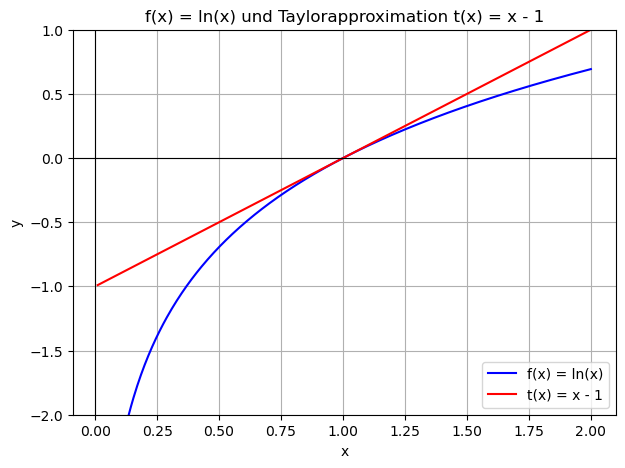

In [82]:
# x-Werte
x = np.linspace(0.01, 2, 400)     # für f(x) = ln(x), nur positive x

# Funktionen
f = np.log(x)
t = x - 1  #Taylor-Approximation 1. Oridnung

# Plot
plt.figure(figsize=(7,5))
plt.plot(x, f, label="f(x) = ln(x)", color="blue")
plt.plot(x, t, label="t(x) = x - 1", color="red")

# Achsen und Details
plt.axhline(0, color="black", linewidth=0.8)   # x-Achse
plt.axvline(0, color="black", linewidth=0.8)   # y-Achse
plt.title("f(x) = ln(x) und Taylorapproximation t(x) = x - 1")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-2,1])
plt.legend()
plt.grid(True)
plt.show()


Es ist deutlich zu erkennen, dass für x nahe 1 kaum ein Unterschied zwischen beiden Funktionen zu erkennen ist. Zusammenfassend: Log-Returns und arithmetische Renditen unterscheiden sich für Tageskurse wegen $x= \frac{S_t}{S_{t-1}} \approx 1$

$$
r_{t-1,t} = \log{\left( \frac{S_t}{S_{t-1}} \right)} \approx \frac{S_t}{S_{t-1}} - 1 = R_{t-1,t} 
$$

nur minimal, da die Kursänderungen von Tag zu Tag nicht wesentlich sind. Beide Rendite-Begriffe haben aus finanzmathematischer Sicht Vor- und Nachteile, die wir später nochmals kurz aufgreifen werden. Aus praktischer Sicht macht  es hingegen kaum einen Unterschied, ob wir Renditen oder Log-Returns analysieren. Betrachtet man beispielsweise das Histogramm der täglichen Returns ist optisch kein wesentlicher Unterschied zwischen Log-Returns und Renditen erkennbar. Für Tagesrenditen bzw. -Returns schreibt man häufig $R_t$ bzw. $r_t$, d. h. lässt den ersten Zeitindex des Anfangsstadiums einfach weg. Außerdem zeigt die Graphik, dass die rote Kurve, welche den prozentualen Zuwächsen und somit Renditen entspricht, immer oberhalb der blaue Kurve verläuft, welche die Log-Returns beschreibt.

## Wertzuwachs über die Zeit: kumulierte Returns vs. Renditen

Die Log-Returns des Zuwachses von der Anfangsinvestition bis zum Zeitpunkt $t$ ist wegen 

<!--to do eqref fuer align???? -->

```{math}
:label: eq:logret-kum

\begin{aligned}
r_{0,t} &= \log(S_t) - \log(S_0) = \log(S_t) - \log(S_{t-1}) + \log(S_{t-1}) \pm \ldots + \log(S_1)-\log(S_0)\\
&=r_{t-1,t} + \ldots + r_{0,1}
\end{aligned}
```

gerade die Summe der täglichen Log-Returns. Somit folgt dann für die Renditen eine Produkt-Struktur

$$
R_{0,t}+1 = \frac{S_t}{S_0}=e^{r_0,t}=e^{\sum\limits_{k=1}^t r_{k-1,k}} = \prod\limits_{k=1}^t e^{r_{k-1,k}} = \prod\limits_{k=1}^t \left(R_{k-1,k} +1 \right)
$$ (eq:rend-kum)

also ähnlich wie beim (geometrischen) Verzinsen mit Zinseszinseffekten. Die Funktionen `cumsum()` und `cumprod()` berechnen für jede Spalte die kumulierten Summen bzw. Produkte, d. h. in der ersten Zeile wird die nur das erste Element und in der zweiten Zeile die ersten beiden Werte usw. in die Summe bzw. das Produkt berücksichtigt. Somit kann die Entwicklung über die Zeit beginnend vom Startwert für beide Returnarten einach berechnet werden.

Price        Rendite  LogReturn  Rendite2  LogReturn2  LogReturn3  \
Date                                                                
2025-09-16 -0.025035  -0.025354 -0.025035   -0.025354   -0.025354   
2025-09-17 -0.006059  -0.006077 -0.006059   -0.006077   -0.006077   
2025-09-18  0.007837   0.007807  0.007837    0.007807    0.007807   
2025-09-19  0.000864   0.000864  0.000864    0.000864    0.000864   
2025-09-22 -0.000576  -0.000576 -0.000576   -0.000576   -0.000576   

Price       LogReturns_kum  Rendite_kum  
Date                                     
2025-09-16        0.441320     0.554758  
2025-09-17        0.435242     0.545337  
2025-09-18        0.443049     0.557449  
2025-09-19        0.443913     0.558795  
2025-09-22        0.443337     0.557898  


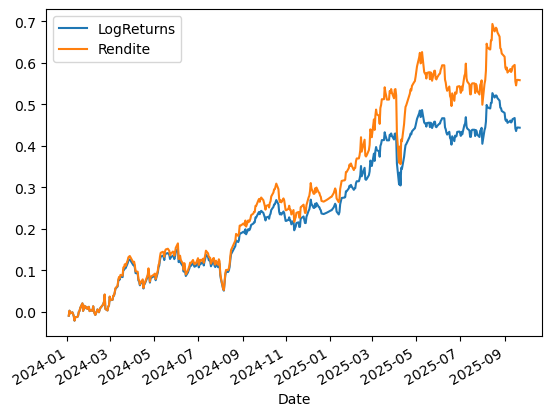

In [83]:
df3['LogReturns_kum']=df3['LogReturn'].cumsum()
df3['Rendite_kum']=(1+df3['Rendite']).cumprod()-1

print(df3.tail())

df3.LogReturns_kum.plot()
df3.Rendite_kum.plot()
plt.legend(['LogReturns','Rendite'])

Es ist deutlich zu erkennen, dass für die frühen Zeitpunkte $t$ sich die Log-Returns und Renditen von 0 (also Jahresanfang 2024) bis $t$ kaum unterscheiden. Mit steigender Zeit $t$ laufen die beiden Renditekurven allerdings auseinander, da sich für größere Zeitabstände eben beide Returndefinitionen unterscheiden. Wie erwartet liegen die (kumulierten) Renditen immer oberhalb der Log-Returns



(annulized-ret)=
## Annualisierte Returns  
<!--(evtl. erst nach Kovarianz verschieben!!! oder reicht Kommentar nach Kovarianz-Abschnitt) -->

Aus Gleichung {eq}`eq:rend-kum` folgt

$$
R_{0,t} = \prod\limits_{k=1}^t \left(R_{k-1,k} +1 \right) - 1 = y_\text{geo}^t - 1
$$ (eq:rend-geom-mean)

d. h. die kumulierte Rendite von 0 nach t lässt sich basierend auf der modifizierten Stichprobe der Tages-Renditen $y_k = R_{k-1,k}+1$ mit Hilfe des geometrischen Mittels für $n=t$

$$
y_\text{geo} = \sqrt[n]{\prod\limits_{k=1}^n y_k} = \left(\prod\limits_{k=1}^n y_k \right)^\frac 1n = \exp{\left( \frac 1n \sum\limits_{k=1}^n \log{y_k} \right)} = \exp{ \left(\overline{\log{y}}\right)}
$$ 

aller Tagesrenditen bis zum Zeitpunkt t ausdrücken. Ebenso können wir für die Log-Returns für die Stichprobe der Tages-Returns $x_k = r_{k-1,k}$ mittels des arithmetischen Mittels $\bar{x}=\frac 1n \sum\limits_{k=1}^n x_k$ wegen Formel {eq}`eq:logret-kum`  schreiben als

$$
r_{0,t} = \sum\limits_{k=1}^t r_{k-1,k} = t \bar{x} 
$$

Außerdem gilt folgender Zusammenhang zwischen geometrischen Mittel der Renditen und arithmetischen Mittel der Log-Returns für beliebige Stichprobengröße $n$

\begin{align*}
(R+1)_\text{geo} &= y_\text{geo} = \left(\prod\limits_{k=1}^n y_k \right)^\frac 1n = \exp{\left( \frac 1n \sum\limits_{k=1}^n \log{y_k} \right)}  = \exp{\left( \frac 1n \sum\limits_{k=1}^n \log{ \left( R_{k-1,k} + 1\right)} \right)} \\
&= \exp{\left( \frac 1n \sum\limits_{k=1}^n r_{k-1,k}  \right)} = \exp{\left( \frac 1n \sum\limits_{k=1}^n x_k  \right)} = \exp{\left( \overline x \right)} =
\exp{\left( \overline r \right)}
\end{align*}

Somit wird aus allen vorhanden Tages-Returns das jeweilige arithmetische und geometrische Mittel geschätzt und dann annualisiert man diese Werte entsprechend obiger Formeln, wobei man typischerweise unterstellt, dass ein Handelsjahr 252 Handelstage hat

$$
r_\text{annualized} = \bar{r}_\text{daily} \cdot 252
$$ (eq:log-annualized)

sowie 

\begin{align}\label{eq:rendite-annualized}
R_\text{annualized} &= (1 + R)_\text{geo,daily}^{252} - 1 = \exp{(r_\text{annualized})} - 1\\
& = \exp{\left(  \bar{r}_\text{daily} \cdot 252 \right)} - 1 % \approx \bar{r}_\text{daily} \cdot 252 \approx \bar{R}_\text{daily} \cdot 252
 \end{align}


Insbesondere für statistische Analylsen werden häufig die Maßzahlen für jährliche Renditen angegeben, um eine bessere Vergleichbarkeit zwischen verschiedenen Anlageprodukten und Anlagezeiträumen durch die entsprechende Skalierung zu erreichen. 




In Abschnitt {ref}`portfolio-momente` benötigen wir die Erwartungswerte, Varianzen sowie Kovarianzen zwischen den einzelnen Aktienrenditen, um die erwartete Portfoliorendite und -Varianz zu berechnen. Für die Log-Returns ist dies aufgrund der Linearität des Erwartungswertes sehr einfach. Aus diesem Grund arbeitet man in der Finanzmathematik auch häufig lieber mit den Log-Returns als den Renditen. Unterstellt man, dass die Tages-Returns der $i$-ten Aktie $r_{i,(k-1,k)}$ unabhängig und identisch verteilte Zufallsvariablen (iid) mit $\mathbb{E} r_{i,(k-1,k)} = \mu_i$ und $\operatorname{Var} r_{i,(k-1,k)}=\sigma^2_i$ sind, folgt für die erwarteten Jahres-Log-Returns sowie deren Varianzen bzw. Volatilitäten / Standardabweichungen

\begin{align*} %\label{eq:expectation-year-log-return}
\mathbb{E} r_{i, \text {annualized}} &= 252 \mu_i  = 252 \cdot \mathbb{E}  r_{i,\text{daily}}\\
\operatorname{Var}(r_{i,\text {annualized}}) &= 252 \sigma^2_i = 252 \cdot \operatorname{Var}(r_{i,\text {daily}})\\
\operatorname{SD}(r_\text {annualized}) &= \sqrt{252} \sigma
\end{align*}

Zur Annualisierung der Kovarianz der täglichen Log-Returns führen wir folgende Bezeichnung ein: $X_k$ sei der zufällige Tages-Return der $i$-ten Aktie von Tag $(k-1)$-ten Tag zum $k$-ten Tag und für die $j$-te Aktie sei $Y_l$ der Tages-Return vom $(l-1)$-ten Tag zum $l$-ten Tag, d. h.

\begin{align*}
X_k &:= r_{i,(k-1,k)} := \log {\left( \frac{S_{i,k}}{S_{i,k-1}} \right)} =  \log S_{i,k} - \log S_{i,k-1}\\
Y_l &:= r_{j,(l-1,l)} := \log {\left( \frac{S_{j,l}}{S_{j,l-1}} \right)} =  \log S_{j,l} - \log S_{j,l-1}\\
\end{align*}

Mit {eq}`eq:logret-kum` folgt daher für die Jahres-Returns (für $t=252$)

\begin{align*}
r_{i,(0,t)} &= \log {\left( \frac{S_{i,t}}{S_{i,0}} \right)} = \sum\limits_{k=1}^t X_k\\
r_{j,(0,t)} &= \log {\left( \frac{S_{j,t}}{S_{j,0}} \right)} = \sum\limits_{l=1}^t Y_l\\
\end{align*}

Unterstellen wir zusätzlich zur Standardannahme (tägliche Returns einer Aktie sind identisch und unabhängig verteilt, d.h. $X_1, \ldots, X_t$ iid sowie $Y_1, \ldots, Y_t$ iid), dass ausschließlich die Tages-Returns zweier verschiedener Aktien am selben Tag korrelieren, also genauer 

$$
\operatorname{Cov}(X_k,Y_l) = \operatorname{Cov}(r_{i,(k-1,k)},r_{j,(l-1,l)})
= \begin{cases}
0, & \text{ falls  } k \neq l\\
\sigma_{ij}, & \text{ falls  } k = l
\end{cases}
$$

erhalten wir für die Kovarianz der Jahres-Returns zwischen der $i$-ten und $j$-ten Aktie

\begin{align}\label{eq:Kov-Jahres-Returns}
\operatorname{Cov}(r_{i,(0,t)} ,r_{j,(0,t)} ) &=  \operatorname{Cov} \left(\sum\limits_{k=1}^t X_k, \sum\limits_{l=1}^t Y_l\right) = 
\sum\limits_{k=1}^t \sum\limits_{l=1}^t \operatorname{Cov}(X_k,Y_l)\\
&= \sum\limits_{k=1}^t \operatorname{Cov}(r_{i,(k-1,k)},r_{j,(k-1,k)}) = t \sigma_{ij}.
\end{align}

Folglich erhalten wir für die annualisierte Kovarianzmatrik der Log-Returngs 

$$
\Sigma_\text {annualized} = 252 \cdot \Sigma_\text{daily},
$$

wobei $\Sigma_\text{daily}$ die Kovarianzmatrix der Tages-Returns bezeichnet. 




Die Annualisierung für die prozentualen Zuwächse ist wegen der Nichtlinearität in {eq}`eq:rend-geom-mean` komplizierter. Analog zu den Log-Returns führen wir für die zufälligen Renditen folgende Bezeichnungen ein 

\begin{align*}
\tilde{X}_k &:= R_{i,(k-1,k)} + 1 = \frac{S_{i,k}}{S_{i,k-1}} \\
\tilde{Y}_l &:= R_{j,(l-1,l)} +1  = \frac{S_{j,l}}{S_{j,l-1}},
\end{align*}

wobei analog zu den Log-Returns $\mathbb{E} R_{i,(k-1,k)} = \tilde{\mu}_i$ und $\operatorname{Var} R_{i,(k-1,k)} = \tilde{\sigma}^2_i$ sowie 

$$
\operatorname{Cov}(\tilde{X}_k,\tilde{Y}_l) = \operatorname{Cov}(R_{i,(k-1,k)}+1,R_{j,(l-1,l)}+1) = \operatorname{Cov}(R_{i,(k-1,k)},R_{j,(l-1,l)})
= \begin{cases}
0, & \text{ falls  } k \neq l\\
\tilde{\sigma}_{ij}, & \text{ falls  } k = l
\end{cases}
$$

Aus Formel {eq}`eq:rend-geom-mean` folgt dann für die erwartete Jahres-Rendite und Varianz


\begin{align*}  
\mathbb{E} R_{i,(0,t)} &= \mathbb{E} \left( \prod\limits_{k=1}^t \left(R_{i,(k-1,k)} +1 \right)  - 1 \right)\\
&= \prod\limits_{k=1}^t \left( \mathbb{E}R_{i,(k-1,k)} +1 \right) -1 \\
&= \left( \prod\limits_{k=1}^t \left(\mathbb{E}  \tilde{X}_k \right)  - 1 \right) = \prod\limits_{k=1}^t \left( \tilde{\mu}_i + 1 \right) -1 = (\tilde{\mu}_i+1)^t - 1\\
\operatorname{Var}(R_{i,(0,t)}) &= \operatorname{Var}\left( \prod\limits_{k=1}^t \tilde{X}_k -1 \right)  = \operatorname{Var}\left( \prod\limits_{k=1}^t \tilde{X}_k \right)\\
&= \mathbb{E}\left( \prod\limits_{k=1}^t \tilde{X}_k \right)^2 - \left(\mathbb{E} \left( \prod\limits_{k=1}^t \tilde{X_k} \right) \right)^2 \\
&=\mathbb{E}\left( \prod\limits_{k=1}^t \tilde{X}_k^2 \right) - \prod\limits_{k=1}^t \left( \mathbb{E} \tilde{X}_k \right)^2\\
&= \left( \tilde{\mu}_i^2 + \tilde{\sigma}^2_i + 2 \tilde{\mu}_i + 1 \right)^t - (\tilde{\mu}_i+1)^{2t}
\end{align*}

Insbesondere die Skalierung der Varianz für die annualisierten Renditen ist demnach also deutlich komplexer und insbesondere auch nichtlinear in der Zeit $t$. Für die Kovarianzen der Jahres-Renditen zwischen der $i$-ten und $j$-ten Aktie ergibt sich bei analogen Annahmen zu den Log-Returns entsprechend



\begin{align*}
\operatorname{Cov}(R_{i,(0,t)} ,R_{j,(0,t)} ) &= \operatorname{Cov}(R_{i,(0,t)} +1,R_{j,(0,t)} +1 )\\
&=  \operatorname{Cov} \left(\prod\limits_{k=1}^t \tilde{X}_k, \prod\limits_{l=1}^t \tilde{Y}_l\right)\\ 
&= \mathbb{E} \left( \prod\limits_{k=1}^t \tilde{X}_k - \mathbb{E} \left( \prod\limits_{k=1}^t \tilde{X}_k \right)\right) 
\left( \prod\limits_{l=1}^t \tilde{Y}_l - \mathbb{E} \left( \prod\limits_{l=1}^t \tilde{Y}_l \right)\right)\\
&= \mathbb{E} \left( \prod\limits_{k=1}^t \tilde{X}_k  - \prod\limits_{k=1}^t \mathbb{E}\tilde{X}_k  \right) \left( \prod\limits_{l=1}^t \tilde{Y}_l  - \prod\limits_{l=1}^t \mathbb{E}\tilde{Y}_l \right)\\
&= \mathbb{E} \left( \prod\limits_{k=1}^t \tilde{X}_k  - (\tilde{\mu_i}+1)^t   \right) \left( \prod\limits_{l=1}^t \tilde{Y}_l  - (\tilde{\mu}_j+1)^t\right)\\
&= \mathbb{E} \left( \prod\limits_{k=1}^t \tilde{X}_k \prod\limits_{l=1}^t \tilde{Y}_l \right) -  (\tilde{\mu}_j+1)^t \mathbb{E} \left( \prod\limits_{k=1}^t \tilde {X}_k \right)\\
& \quad - (\tilde{\mu}_i+1)^t \mathbb{E} \left( \prod\limits_{l=1}^t \tilde{Y}_l \right) +  (\tilde{\mu}_i+1)^t  (\tilde{\mu}_j+1)^t\\
&= \mathbb{E} \left( \prod\limits_{k=1}^t \tilde{X}_k \tilde{Y}_k \right) - (\tilde{\mu}_i+1)^t  (\tilde{\mu}_j+1)^t \\
&= \prod\limits_{k=1}^t \mathbb{E} \left(  \tilde{X}_k \tilde{Y}_k \right) - (\tilde{\mu}_i+1)^t  (\tilde{\mu}_j+1)^t \\
&= \left( \tilde{\sigma}_{ij} + \tilde{\mu_i}\tilde{\mu_j} + \tilde{\mu}_i + \tilde{\mu_j} + 1\right)^t  - (\tilde{\mu}_i+1)^t  (\tilde{\mu}_j+1)^t
\end{align*}

wobei die letzte Gleichung aus 


\begin{align*}
\tilde{\sigma}_{ij} &= \operatorname{Cov}(R_{i,(k-1,k)}, R_{j,(k-1,k)}) = \operatorname{Cov}(R_{i,(k-1,k)}+1, R_{j,(k-1,k)}+1)\\
&=\operatorname{Cov}(\tilde{X}, \tilde{Y})= \mathbb{E} \left(\tilde X \tilde Y \right) - \mathbb{E} \tilde{X} \cdot \mathbb{E} \tilde{Y} 
= \mathbb{E} \left(\tilde X \tilde Y \right) - (\tilde{\mu}_i +1)(\tilde{\mu}_j +1)
\end{align*}


folgt. 
<!--Prinzipiell können wir also aus mit Formel {eq}`eq-expectation-year-log-return` sowie  {eq}`eq-Kov-Jahres-Rendite` von den täglichen Erwartungswertvektor bzw. Kovarianzmatrix der Renditen übergehen zu den annualisierten Werten, allerdings nicht so einfach wie für die Log-Returns. Wegen
-->
Prinzipiell können wir also mit diesen Formeln von dem täglichen Erwartungswertvektor bzw. Kovarianzmatrix der Renditen übergehen zu den annualisierten Werten, allerdings nicht so einfach wie für die Log-Returns. 

<!--
Wegen


\begin{align}\label{eq:test}
R_\text{annualized} &= \exp{(r_\text{annualized})} - 1 = \exp{(252 r_\text{daily})} - 1\\
& \approx 252 \cdot \bar{r}_\text{daily}\\ &\approx 252 \cdot\bar{R}_\text{daily} 
\end{align}  
wird aber häufig als Approximation vereinfachent genutzt. Wir werden unten bei der Berechnung der Portfolio-Varianz die Fehler dieser Approximation sehen.
-->

<!--
\begin{align*}
R_\text{annualized} &= \exp{r_\text{annualized}} - 1 = \exp{\left( 252 r_\text{daily} \right)} - 1\\
& \approx 252 \cdot \bar{r}_\text{daily}\\ &\approx 252 \cdot\bar{R}_\text{daily} 
\end{align*}  
-->



## Statistische Analyse der Returns

Wie oben gesehen sind die Unterschiede zwischen **täglichen** Log-Returns und Renditen nicht wesentlich. So sehen die Histogrammen, die die Verteilung der täglichen Wertzuwächse wiedergeben sehr ähnlich aus, wie die folgenden beiden Graphiken zeigen. 
Der folgende Code erzeugt nicht nur ein klassisches Histogramm, sondern fügt noch den Standard-Kerndichteschätzer[^2], was man einfach als empirische Dichtefunktion interpretieren kann, sondern auch noch zum Vergleich die angepasste Normalverteilungsdichte[^3].

[^2]: Standardmäßig basiert der Kerndichteschätzer auf glockenförmig überlagerten Gaussfunktionen, es können allerdings auch andere Kernels zur Schätzung verwendet werden, hier soll darauf allerdings nicht weiter eingegangen werden. Beispielsweise liefert das  [Statsmodels-Package](https://www.statsmodels.org/dev/examples/notebooks/generated/kernel_density.html) verschiedene andere Kernels. 

[^3]: Die Parameter der Normalverteilung werden mittels der Funktion `fit()` vpm [Normalverteilungs-Sub-Package](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) geschätzt, können aber natürlich auch einfach mittels aritmetischen Mittel und empirischer Standardabweichung aus  dem Numpy-Package geschätzt werden.  

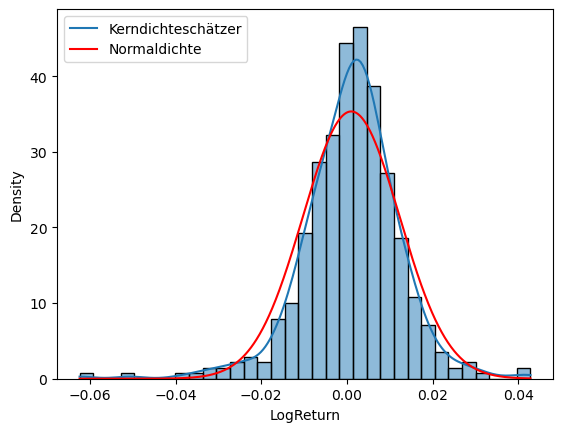

In [84]:

from scipy.stats import norm

#Parameter der NV aus Daten schaetzen
mu_log, std_log = norm.fit (df3.LogReturn) 

#Alternative mit selben Schaetzwerten 
#mu2 = np.mean(df3['LogReturn'])
#std2 = np.std(df3['LogReturn'])
#print("Schätzer mu=%f vs mu2 =%f" % (mu, mean))
#print("Schätzer std=%f vs std2 =%f" % (std, std2))

# x Werte fuer Dichteplot der Normalverteilung
x = np.linspace(min(df3['LogReturn']), max(df3['LogReturn']), 1000)

#Histogramm mit kernel
sns.histplot(df3['LogReturn'], stat = 'density', kde=True)

#Dichte = pdf mit gefitteten Parametern
y = norm.pdf(x, mu_log, std_log)

#hinzufügen der Dichte zum Histogramm:
plt.plot(x, y, color='red')
#Legende hinzufügen
plt.legend(['Kerndichteschätzer','Normaldichte'])

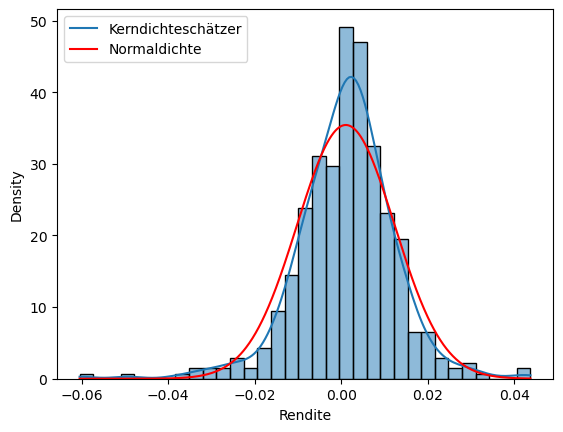

In [85]:
#Analoges Vorgehen für Renditen
mu, std = norm.fit (df3.Rendite) 
x = np.linspace(min(df3['Rendite']), max(df3['Rendite']), 1000)
sns.histplot(df3['Rendite'], stat = 'density', kde=True)
y = norm.pdf(x, mu, std)
plt.plot(x, y, color='red')
plt.legend(['Kerndichteschätzer','Normaldichte'])

Der Kerndichteschätzer zeigt eine typische glockenförmige Verteilung. Allerdings zeigt der Vergleich zwischen Kerndichteschätzer und Normalverteilungsdichte eine recht deutlichte Abweichung zur Normalverteilung. In den Rändern der empirischen Verteilung liegen deutlich mehr Werte als bei der Normalverteilung üblich. Insbesondere die linke Seite, die starke Verluste repräsentiert, ist stärker ausgeprägt und dies spricht für eine leptokurtsiche Verteilung. Mit Hilfe der 3. und 4. Momente werden wir dies auch mit Hilfe statistischer Maßzahlen in [](momente) ausdrücken.

In [86]:
print("mittlere Tages-Rendite: %f Tages-LogReturns: %f" % (mu, mu_log))
print("Standardabweichung Tages-Rendite: %f Tages-LogReturns: %f" % (std, std_log))

mittlere Tages-Rendite: 0.001076 Tages-LogReturns: 0.001012
Standardabweichung Tages-Rendite: 0.011263 Tages-LogReturns: 0.011291


Oben haben wir bereits mittleren Tages-Returns und die Standardabweichungen berechnet. Allerdings kann man dies auch gleich spaltenweise für den gesamten DataFrame. Zu beachten gilt hier natürlich, ob die Maßzahl tatsächlich auch sinnvoll für jede Variable / Spalte ist. Die Mittelung der durchschnittlich kumilierten Returns ist beipspielsweise nicht sinnvoll, da für jede Zeile verschiedene Zeitpunkte betrachtet werden und somit keine stationäre Zeitreihe mehr vorliegt. Daher sollten die letzten beiden Spalten bei der Interpretation ausgelassen (oder noch besser ausgeblendet) werden, wie wir im Folgenden noch demonstrieren.

In [87]:
df3.mean()

Price
Rendite           0.001076
LogReturn         0.001012
Rendite2          0.001076
LogReturn2        0.001012
LogReturn3        0.001012
LogReturns_kum    0.247171
Rendite_kum       0.296294
dtype: float64

In [88]:
df3.std()

Price
Rendite           0.011276
LogReturn         0.011304
Rendite2          0.011276
LogReturn2        0.011304
LogReturn3        0.011304
LogReturns_kum    0.157154
Rendite_kum       0.204318
dtype: float64

Die `describe()` Funktion liefert eine Übersicht der wichtigsten Statistik-Maßzahlen

In [89]:
df3.describe()

Price     Rendite   LogReturn    Rendite2  LogReturn2  LogReturn3  \
count  438.000000  438.000000  438.000000  438.000000  438.000000   
mean     0.001076    0.001012    0.001076    0.001012    0.001012   
std      0.011276    0.011304    0.011276    0.011304    0.011304   
min     -0.060486   -0.062393   -0.060486   -0.062393   -0.062393   
25%     -0.005004   -0.005017   -0.005004   -0.005017   -0.005017   
50%      0.001560    0.001559    0.001560    0.001559    0.001559   
75%      0.007312    0.007286    0.007312    0.007286    0.007286   
max      0.043782    0.042850    0.043782    0.042850    0.042850   

Price  LogReturns_kum  Rendite_kum  
count      438.000000   438.000000  
mean         0.247171     0.296294  
std          0.157154     0.204318  
min         -0.021875    -0.021637  
25%          0.111309     0.117740  
50%          0.235005     0.264915  
75%          0.421211     0.523806  
max          0.526719     0.693367

Mittels `apply()` können auch einzelne oder mehrere Funktionen auf die Spalten (axis = 0) bzw. Zeilen (axis=1) angewendet werden

In [90]:
df3.apply([np.mean, np.std], axis = 0)

Price   Rendite  LogReturn  Rendite2  LogReturn2  LogReturn3  LogReturns_kum  \
mean   0.001076   0.001012  0.001076    0.001012    0.001012        0.247171   
std    0.011263   0.011291  0.011263    0.011291    0.011291        0.156974   

Price  Rendite_kum  
mean      0.296294  
std       0.204085

Natürlich können auch eigene Funktionen angewendet werden. Der folgende Code zeigt beispielhaft die selbstständige Berechnung der ersten beiden empirischen Momente:

In [91]:
def my_mean(x):
    return np.sum(x) / x.size

def my_var(x, correction = True):
    n = x.size
    m = my_mean(x)
    ss = ((x-m)**2).sum()
    df = n #biased variance estimator!
    if correction:
        #Bessel correction gives unbiased variance estimate
        df = df - 1
    return ss/df
    
def my_var2(x):
    n = x.size
    m = my_mean(x)
    ss = (x**2).sum() - n*m**2
    return ss/(n-1)

def my_var_biased(x):
    return my_var(x, correction=False)


def my_sd(x):
    return np.sqrt(my_var(x))    

df3.apply([my_mean, my_var, my_var_biased, my_sd], axis = 0, correction = True)


Price           Rendite  LogReturn  Rendite2  LogReturn2  LogReturn3  \
my_mean        0.001076   0.001012  0.001076    0.001012    0.001012   
my_var         0.000127   0.000128  0.000127    0.000128    0.000128   
my_var_biased  0.000127   0.000127  0.000127    0.000127    0.000127   
my_sd          0.011276   0.011304  0.011276    0.011304    0.011304   

Price          LogReturns_kum  Rendite_kum  
my_mean              0.247171     0.296294  
my_var               0.024697     0.041746  
my_var_biased        0.024641     0.041651  
my_sd                0.157154     0.204318

Die Berechnung der statistischen Kennzahlen für die kumulierten Returns (letzten beiden Spalten) macht wie oben bereits erwähnt keinen Sinn, daher schließen wir sie einfach aus der Auswertung aus. 

In [92]:
df3.drop(columns=["LogReturns_kum","Rendite_kum"]).apply([my_mean, my_var, my_var_biased, my_sd], axis = 0, correction = True)

Price           Rendite  LogReturn  Rendite2  LogReturn2  LogReturn3
my_mean        0.001076   0.001012  0.001076    0.001012    0.001012
my_var         0.000127   0.000128  0.000127    0.000128    0.000128
my_var_biased  0.000127   0.000127  0.000127    0.000127    0.000127
my_sd          0.011276   0.011304  0.011276    0.011304    0.011304

Alternativ kann man natürlich einfach die Variablen angeben, die man auswerten möchte: hier bietet sich neben der Funktion `drop()` auch die Pandas Funktion `filer()` an, bei der man beispielsweise mittels sogenannter <a href="https://docs.python.org/3/howto/regex.html" target="_blank" rel="noopener noreferrer">Regular Expressions</a> (siehe auch <a href="https://howtoregex.com/cheat-sheet/python" target="_blank" rel="noopener noreferrer">Regex Cheat Sheet</a>) sehr vielfältige Bedingungen formulieren kann, siehe
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html" target="_blank" rel="noopener noreferrer">Pandas Docu</a>.
Im folgenden Code wollen wir alle Variablen die mit 'Log' beginnen (`^Log`) aber am Ende **nicht** auf '_kum' enden (negative lookahead: `(?!.*_kum$)`) auswerten:


In [93]:
df3.filter(regex=r"^Log(?!.*_kum$)").apply([my_mean, my_var, my_var_biased, my_sd], axis = 0, correction = True)

Price          LogReturn  LogReturn2  LogReturn3
my_mean         0.001012    0.001012    0.001012
my_var          0.000128    0.000128    0.000128
my_var_biased   0.000127    0.000127    0.000127
my_sd           0.011304    0.011304    0.011304

**Hinweis**: man kann das beliebig individualisieren. In manchen Auswertungen möchte man beispielsweise nur Variablen mit numerischen Werten auswerten, dann ist die Funktion `select_dtypes()` für die Auswahl bestimmer Datentypen hilfreich.

Ebenso kann die Funktion `agg()` wie die Funktion `apply()` angewendet werden: 

In [94]:
df3.drop(columns=["LogReturns_kum","Rendite_kum"]).agg([my_mean, np.mean, my_var, my_var2, my_var_biased, my_sd, np.std])


/tmp/ipykernel_32269/1356242698.py:1: FutureWarning: The provided callable <function mean at 0x7f07d4277d80> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df3.drop(columns=["LogReturns_kum","Rendite_kum"]).agg([my_mean, np.mean, my_var, my_var2, my_var_biased, my_sd, np.std])
/tmp/ipykernel_32269/1356242698.py:1: FutureWarning: The provided callable <function std at 0x7f07d4277ec0> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df3.drop(columns=["LogReturns_kum","Rendite_kum"]).agg([my_mean, np.mean, my_var, my_var2, my_var_biased, my_sd, np.std])


Price           Rendite  LogReturn  Rendite2  LogReturn2  LogReturn3
my_mean        0.001076   0.001012  0.001076    0.001012    0.001012
mean           0.001076   0.001012  0.001076    0.001012    0.001012
my_var         0.000127   0.000128  0.000127    0.000128    0.000128
my_var2        0.000127   0.000128  0.000127    0.000128    0.000128
my_var_biased  0.000127   0.000127  0.000127    0.000127    0.000127
my_sd          0.011276   0.011304  0.011276    0.011304    0.011304
std            0.011276   0.011304  0.011276    0.011304    0.011304

(momente)=
### höhere Momente: Schiefe und Kurtosis

Allgemein kann die Verteilung einer Stichprobe mittels der empirischen zentralen bzw. allgemeinen Momente 

$$
\tilde{M}_k = \frac 1n \sum\limits_{i=1}^n \left( x_i - \bar{x} \right)^k \qquad \text{ bzw. } \qquad M_k = \sum\limits_{i=1}^n x_i^k
$$

beschrieben werden. Während das 1. Moment $M_1 = \overline x$ den Mittelwert der Verteilung beschreibt, wird die Schwankung mittels des 2. Moments beschrieben und entspricht dem unkorrigierten Varianzschätzer 

$$
\tilde{M}_2 = \tilde{s}^2 = \frac 1n \sum\limits_{i=1}^n (x_i - \overline x)^2 = \frac 1n \sum\limits_{i=1}^n x_i^2 - \overline{x}^2 = M_2 - M_1^2
$$

Die sogenannte Z-Transformation einer Stichprobe $x_1, x_2, \ldots, x_n$ ist eine Standardisierung[^4] der Werte 
$z_i = \frac{x_i - M_1}{\sqrt{M_2}} = \frac{x_i - \overline x}{\tilde s}$, so dass diese Stichprobe wegen $M_1(z) = \frac1n \sum\limits_{i=1}^n z_i = 0$ um die Null schwankt mit Varianz 

$$
\tilde{M}_2(z) = \frac 1n \sum\limits_{i=1}^n (z_i - \overline{z})^2 = \frac 1n \sum\limits_{i=1}^n z_i^2 = 
\frac 1n \sum\limits_{i=1}^n  \left( \frac{x_i - \overline{x} }{\tilde s} \right) ^2
= \frac{\frac 1n \sum\limits_{i=1}^n \left( x_i - \overline x \right)^2}{\tilde s^2} = \frac{\tilde{M}_2(x)}{\tilde{M}_2(x)}= 1
$$


In [95]:
def my_central_moments(x,k):
    n = x.size
    m = x.sum()/n
    return ((x-m)**k).sum()/n

#2. Moment = Varianz
s2 = my_var(df3['LogReturn'])
s2_1 = my_central_moments(df3['LogReturn'], 2)
s2_2 = my_var_biased(df3['LogReturn'])

print("unbiased var = %f, 2. zentrales Moment = %f, biased var = %f" %  (s2,s2_1, s2_2))

unbiased var = 0.000128, 2. zentrales Moment = 0.000127, biased var = 0.000127



[^4]: Arbeitet man mit höheren Momenten verwendet man zur Standardisierung aus Bequemlichkeit häufig den verzerrten Varianzschätzer $\tilde{s}^2 = \tilde{M}_2$ anstatt die korrigierte und somit erwartungstreue Version $s^2 = \frac{n}{n-1} \tilde{M}_2 = \frac1{n-1} \sum\limits_{i=1}^n (x_i - \overline{x})^2$. Bei einigen implementierten Funktionen kann durch ein zusätzliches Argument zwischen unverzerrten und verzerrten Schätzern gewählt werden. Hier sollte vor Verwendung immer die Dokumentation betrachtet werden.




Mittels dem 3. Moment wird die (empirische) **Schiefe** einer Verteilung berechnet

$$
	g = \frac{\tilde{M}_3(x)}{\tilde{M}_2(x)^\frac 32} = \frac{\frac{1}{n}\sum\limits_{i=1}^n \left( x_i - \bar{x} \right)^3}{\sqrt{ \left( \frac{1}{n}\sum\limits_{i=1}^n \left( x_i - \bar{x} \right)^2 \right)^3}} = \frac{ 
     \left(\frac 1n \sum\limits_{i=1}^n (x_i - \bar{x}) \right)^3}{\tilde s^3} = \frac 1n
    \sum\limits_{i=1}^n \left( \frac{x_i - \overline x}{\tilde s} \right)^3 = \tilde{M}_3(z).
$$

Für symmetrische Verteilungen verschwindet die Schiefe  ($\bar{x} \approx x_{med} \approx x_{mod}$, $g \approx 0$), während für linksschiefe (rechtssteil) Verteilungen der Wert negativ wird  ($\bar{x} < x_{med} < x_{mod}$, $g<0$) und für rechtsschiefe (linkssteil) Verteilungen  ($\bar{x} > x_{med} > x_{mod}$, $g>0$) sich ein postiver Wert ergibt. 



In [96]:
def schiefe(x):
    m = x.sum()
    s = np.sqrt(my_central_moments(x,2))

    #s = x.std(ddof=0)   # Populations-Std für Normierung
    #n = x.size
    z = (x-m)/s
    return (my_central_moments(z,3))

#3. Moment / Schiefe
m3 = my_central_moments(df3['LogReturn'], 3)
g = schiefe(df3['LogReturn'])

print("Schiefe: g = %f basierend auf 3. zentralen Moment = %f" %  (g, m3))

Schiefe: g = -0.647898 basierend auf 3. zentralen Moment = -0.000001


Mittels 4. Moment misst man die Wölbung bzw. Krümmung einer Verteilung

$$
\gamma = \frac{\tilde{M}_4(x)}{\tilde{M}_2^2(x)}-3 = \frac{\frac{1}{n}\sum\limits_{i=1}^n \left( x_i - \bar{x} \right)^4}{\left( \frac{1}{n}\sum\limits_{i=1}^n \left( x_i - \bar{x} \right)^2 \right)^2} - 3  = \frac 1n \sum\limits_{i=1}^n \left( \frac{x_i - \bar{x}}{\tilde s} \right)^4 -3 =  \tilde{M}_4(z) -3
$$

wobei die Verschiebung um 3 für die bessere Interpretierbarkeit bzw. dem Vergleich zur Normalverteilung dient, denn diese Kennzahl vergleicht wie stark  der zentrale Bereich und folglich auch wie schwach die 'tails' im Vergleich zur Normalverteilung besetzt sind.
Werte von $\gamma \approx 0$ sind typisch für eine Normalverteilung, während positive Werte für eine spitzere Verteilung ($\gamma > 0$) mit mehr Maße in den Tails und negative Werte für eine breitere Verteilung ($\gamma < 0$) sprechen.
	

In [97]:
def woelbung(x):
    m = x.sum()
    s = np.sqrt(my_central_moments(x,2))

    #s = x.std(ddof=0)   # Populations-Std für Normierung
    #n = x.size
    z = (x-m)/s
    return (my_central_moments(z,4) - 3)

#4. Moment / Krümmung
m4 = my_central_moments(df3['LogReturn'], 4)
k = woelbung(df3['LogReturn'])

print("Kurtosis: gamma = %f basierend auf 4. zentralen Moment = %f" %  (k, m4))


Kurtosis: gamma = 3.889362 basierend auf 4. zentralen Moment = 0.000000


In [98]:
df3.drop(columns=["LogReturns_kum","Rendite_kum"]).agg([schiefe, woelbung])

Price      Rendite  LogReturn  Rendite2  LogReturn2  LogReturn3
schiefe  -0.556320  -0.647898 -0.556320   -0.647898   -0.647898
woelbung  3.634656   3.889362  3.634656    3.889362    3.889362


Natürlich gibt es auch enstprechende Pakete, um diese Kennzahlen einfach zu berechnen. Hier nutzen wir das Sub-Package `scipy.stats`


In [99]:
from scipy.stats import skew, kurtosis, moment

#g = schiefe(df3['LogReturn'])
#k = woelbung(df3['LogReturn'])
#Package Version:
g2 = skew(df3['LogReturn'])
k2 = kurtosis(df3['LogReturn'])
m3_sci = moment(df3['LogReturn'],  order=3)

print("Schiefe: g = %f, scipy.stats.skew  = %f" %  (g, g2 ))
print("3. Moment: m3 = %f, scipy.stats.moment = %f" % (m3, m3_sci))

print("Kurtosis: k = %f, Scipy.stats.kurtosis  = %f" %  (k, k2))

#kompletter DataFrame
print("Skew: %s" % df3.skew())

print("Kurtosis: %s" % df3.kurtosis())




Schiefe: g = -0.647898, scipy.stats.skew  = -0.647898
3. Moment: m3 = -0.000001, scipy.stats.moment = -0.000001
Kurtosis: k = 3.889362, Scipy.stats.kurtosis  = 3.889362
Skew: Price
Rendite          -0.558233
LogReturn        -0.650127
Rendite2         -0.558233
LogReturn2       -0.650127
LogReturn3       -0.650127
LogReturns_kum    0.080472
Rendite_kum       0.238397
dtype: float64
Kurtosis: Price
Rendite           3.690316
LogReturn         3.947954
Rendite2          3.690316
LogReturn2        3.947954
LogReturn3        3.947954
LogReturns_kum   -1.303929
Rendite_kum      -1.300680
dtype: float64


Wir haben hier ausschließlich Tages-Returns ausgewertet, allerdings haben wir in {ref}`annulized-ret` gesehen, wie wir diese zu Jahres-Returns skalieren können. Insbesondere Schiefe und Kurtosis sind im Gegensatz zu den zentrierten 3. bzw. 4. Momenten aber skalierungsfrei, da sich die Skalierungsfaktoren bei der Normierung herauskürzen. 

(testnormal)=
### Test auf Normalverteilung 

to do
* graphische Analyse mit Histogramm und qq-plots
* Shapiro Wilk, KS-Test, Liliefors Korrektur, usw.
* scipy: normaltest [](https://docs.scipy.org/doc/scipy/tutorial/stats/hypothesis_normaltest.html#hypothesis-normaltest)

In [100]:
from scipy import stats
test1 = stats.shapiro(df3['LogReturn'])
print(test1)
test2 = stats.normaltest(df3['LogReturn'])
print(test2)

ShapiroResult(statistic=0.9535090572985092, pvalue=1.629591726264756e-10)
NormaltestResult(statistic=72.36946110001523, pvalue=1.9282848670573532e-16)


to do: Auswertung... alle p-values sehr klein (<0.05) und somit signifikanter Nachweis, dass Log-Returns nicht normalverteilt...



### Abhängigkeiten zwischen Aktien-Returns: Kovarianz und Korrelation

<!-- ## Zusammenhangsmaße: Kovarianz und Korrelation -->

Bevor wir Portfolio-Returns untersuchen, analysieren wir noch die Abhängigkeiten zwischen den einzelnen Aktien-Renditen.

/tmp/ipykernel_32269/1712810207.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  portfolio_data = yf.download(tickers, period="2y")
[*********************100%***********************]  4 of 4 completed


Ticker            AAPL       GOOGL        MSFT        TSLA
Date                                                      
2023-09-22  173.094543  129.357788  312.303619  244.880005
2023-09-25  174.372070  130.211914  312.825745  246.990005
2023-09-26  170.292007  127.689339  307.505951  244.119995
2023-09-27  168.776840  129.645798  308.146240  240.500000
2023-09-28  169.034332  131.403717  308.983673  246.380005


<Axes: xlabel='Date'>

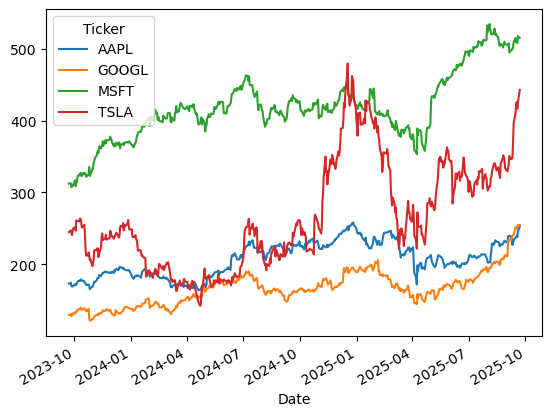

In [101]:
tickers = ["AAPL", "MSFT", "GOOGL", "TSLA"]

# Kurse herunterladen (letztes Jahr)
portfolio_data = yf.download(tickers, period="2y")  
#print(data.head())
close_df = portfolio_data["Close"].copy()

# Index (Datum) zurück als Spalte holen
#close_df = close_df.set_index('Date')

print(close_df.head())
close_df.plot()


Wir interessieren uns für den Zusammenhang der Renditen dieser Aktien

Ticker          AAPL     GOOGL      MSFT      TSLA
Date                                              
2023-09-22       NaN       NaN       NaN       NaN
2023-09-25  0.007381  0.006603  0.001672  0.008616
2023-09-26 -0.023399 -0.019373 -0.017006 -0.011620
2023-09-27 -0.008897  0.015322  0.002082 -0.014829
2023-09-28  0.001526  0.013559  0.002718  0.024449


<Axes: xlabel='Date'>

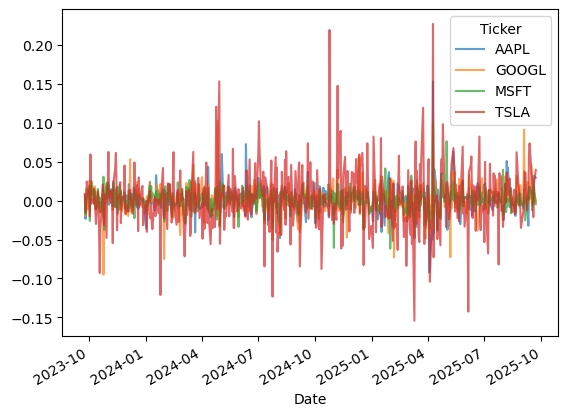

In [102]:
renditen = close_df.pct_change()

print(renditen.head())
renditen.plot(alpha = 0.7)

Während oben bereits der zeitliche Verlauf unterschiedliche Zusammenhänge verdeutlicht, ist die Darstellung in Scatterplots übersichtlicher: 

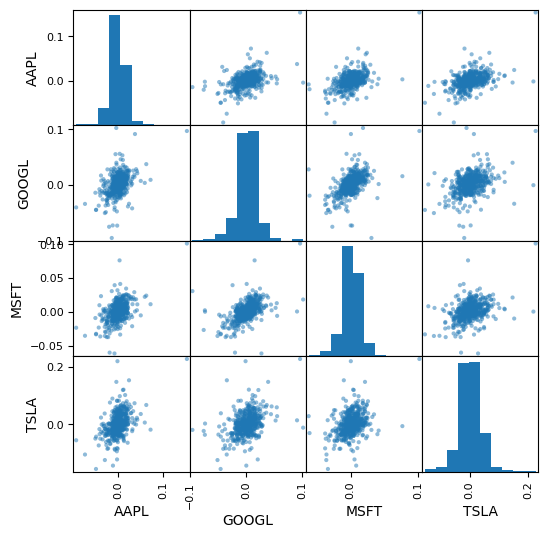

In [103]:
pd.plotting.scatter_matrix(renditen, figsize=(6, 6), diagonal="hist")
plt.show()

/HOME1/users/personal/dana/miniconda3/envs/finance/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


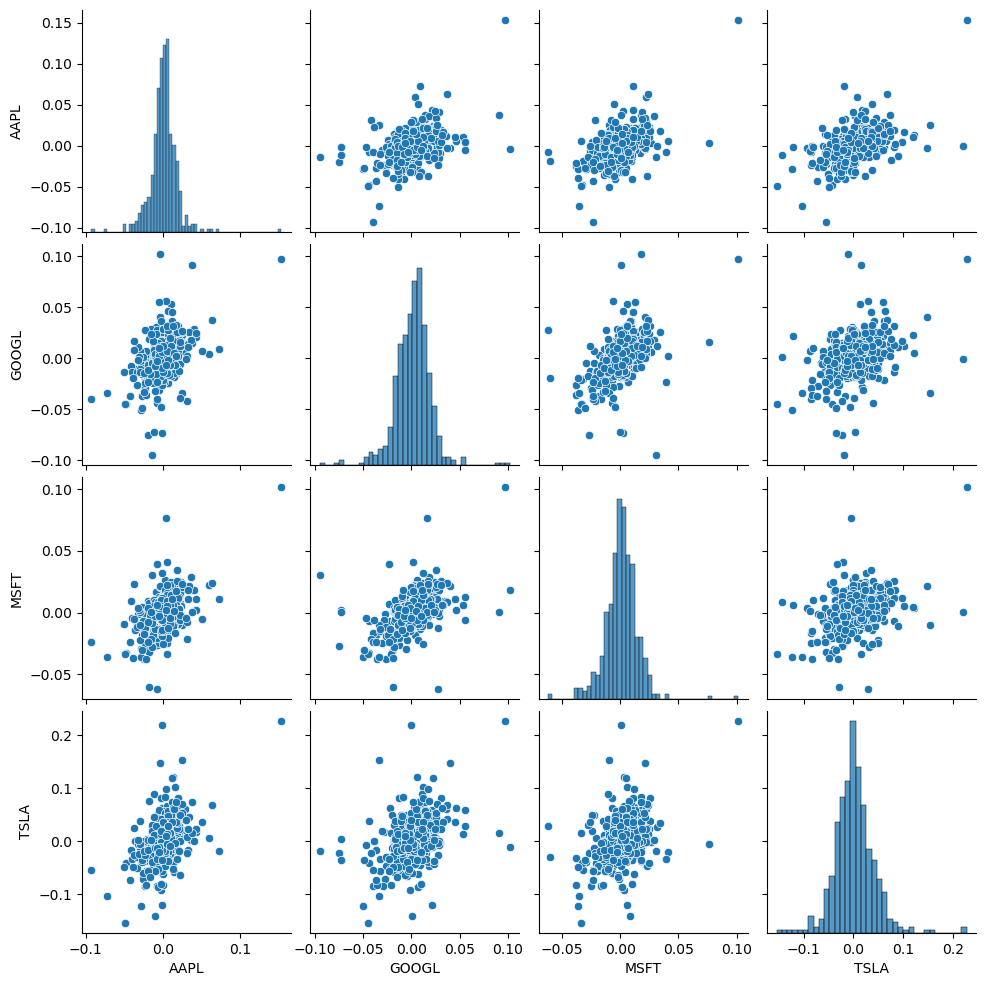

In [104]:
sns.pairplot(renditen)
plt.show()

Natürlich können auch nur einzelne Paare beispielsweise mittels der Seaborn Funktionen `scatterplot()` oder `relplot()` dargestellt werden. Auf den ersten Blick unterscheiden sich die Funktionen nicht, allerdings liefert die zweite Funktionen flexiblere Anpassungsmöglichkeiten[^5].

[^5]: Die Funktion `relplot()` erzeugt sogenannte 'relational plots' und kann neben Scatter-Plots auch Line-Plots erzeugen und kann im Gegensatz zu `scatterplot()` mehrere Sub-Plots in einer Graphik darstellen. Für Details und Beispiele verweisen wir hier auf die [Seaborn-Doku](https://seaborn.pydata.org/generated/seaborn.relplot.html).

<Axes: xlabel='AAPL', ylabel='TSLA'>

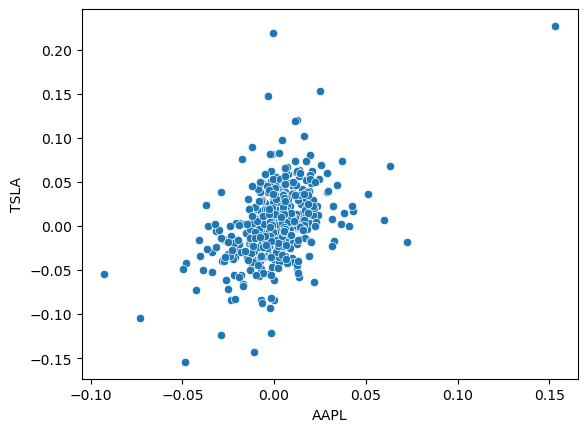

In [105]:
sns.scatterplot(data = renditen, x='AAPL', y='TSLA')

/HOME1/users/personal/dana/miniconda3/envs/finance/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


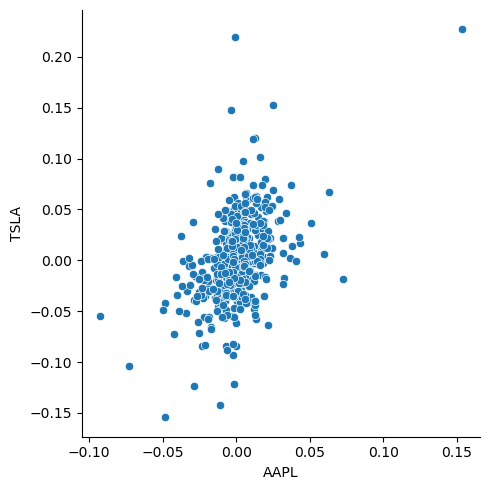

In [106]:
sns.relplot(data = renditen, x='AAPL', y='TSLA', kind = 'scatter')

Alle Scatter-Plots zeigen einen mehr oder weniger starken positiven Zusammenhang zwischen den Renditen zweier Aktien. Steigt die Rendite der einen Aktie, dann steigt üblicherweise auch die der anderen Aktie und fällt die eine Rendite, dann auch die andere. Die einfachste statistische Maßzahl zur Erfassung des Zusammenhangs sind die (empirische) Kovarianz und Korrelation[^6], die allerdings nur den linearen Zusammenhang erfassen.
Die (unverzerrte) empirische Kovarianz zweier Stichproben $(x,y)=((x_1,y_1), \ldots, (x_n,y_n))$ wird mittels

$$
s_{xy} = \frac1{n-1} \sum\limits_{i=1}^n (x_i - \overline x)(y_i - \overline y) = \frac 1{n-1} \left(\sum\limits_{i=1}^n x_i y_i - n  \overline x \overline y \right)
$$

berechnet. Die Korrelation entsteht durch Normierung und ist einfacher zu interpretieren

\begin{align*}
r_{xy} &= \frac{s_{xy}}{s_x \dot s_y} = \frac{\sum\limits_{i=1}^n (x_i - \overline x)(y_i - \overline y)}{\sqrt{\sum\limits_{i=1}^n (x_i - \overline x)^2 \cdot \sum\limits_{i=1}^n (y_i - \overline y)^2}}\\
&= \frac{\sum\limits_{i=1}^n x_i y_i - n  \overline x \overline y}{\sqrt{\left(\sum\limits_{i=1}^n x_i^2 - n  \overline x^2\right) \left(\sum\limits_{i=1}^n y_i^2 - n  \overline y^2 \right)}} \in [-1,1]
\end{align*}

[^6]: Die Kovarianz zweier Zufallsvariablen $X$ und $Y$ ist definiert als $\operatorname{cov}(X,Y) = \mathbb{E}(X-\mathbb{E})(Y-\mathbb{E}Y)=\mathbb{E}(XY)-\mathbb{E}X \cdot \mathbb{E}Y$ und die Korrelation nach Pearson  $\operatorname{cor}(X,Y) = \frac{\operatorname{cov}(X,Y)}{\sqrt{\operatorname{Var}(X) \cdot \operatorname{Var{Y}}}} \in [-1,1]$ skaliert die Werte für eine bessere Interpretierbarkeit. Aus Unabhängigkeit folgt wegen $\mathbb{E} XY = \mathbb{E} X \cdot \mathbb{E} Y$ gerade $\operatorname{cov}(X,Y)=0$ und somit Unkorreliertheit, die Rückrichtung gilt allerdings im Allgemeinen nicht, beispielsweise sind $X \sim \mathcal{N}(0,1)$ und $Y=X^2$ offensichtlich abhängig, aber unkorrelierte Zufallsvariablen da $\operatorname{cov}(X,Y)= \mathbb{E}(XY)-\mathbb{E}X \cdot \mathbb{E}Y = \mathbb{E}(X^3) = 0$ gilt.
<!-- check \cov klappt nicht in _config.yml - warum??? -->

Pandas hat die Berechnung der empirischen Kovarianz- und Korrelation bereits implementiert und fasst alle paarweisen Kombinationen in der Kovarianz- bzw. Korrelationsmatrix zusammen. Auf der Diagonalen der Kovarianzmatrix stehen also die Varianzen.

In [107]:
kovarianz = renditen.cov()
print(kovarianz)

Ticker      AAPL     GOOGL      MSFT      TSLA
Ticker                                        
AAPL    0.000308  0.000152  0.000127  0.000319
GOOGL   0.000152  0.000362  0.000138  0.000292
MSFT    0.000127  0.000138  0.000199  0.000210
TSLA    0.000319  0.000292  0.000210  0.001587


In [108]:
korrelation = renditen.corr()
print(korrelation)

Ticker      AAPL     GOOGL      MSFT      TSLA
Ticker                                        
AAPL    1.000000  0.456652  0.512830  0.456505
GOOGL   0.456652  1.000000  0.513299  0.385427
MSFT    0.512830  0.513299  1.000000  0.374229
TSLA    0.456505  0.385427  0.374229  1.000000


Zum Abschluss zeichnen wir noch die Regressionsgerade in den Scatterplot ein. Mit Regressionsmodellen beschäftigen wir und noch ausführlich in Abschnitt {ref}`regression`

<Axes: xlabel='AAPL', ylabel='MSFT'>

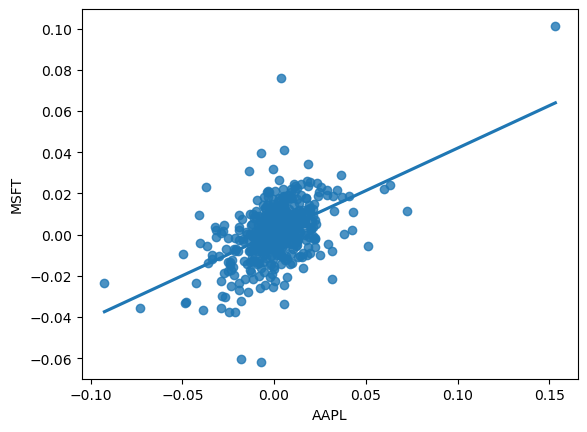

In [109]:
sns.regplot(data=renditen, x="AAPL", y="MSFT",  ci = None)

### to do: Vorsicht bei der Skalierung der 'zeitlineare' Log-Returns um von Tages-Returns zu Jahres-Returns überzugehen

* bisher: annualisiere Erwartungswert und Kovarianz aus Daily Maßzahlen 
* einfacher Vergleich der skalierten Log-Returns zeigt es ist falsch: annualisiere Returns durch Zeitskalierung und berechne Maßzahlen, Erwartungswerte sind identisch aber Kovarianz / Varianz wird maßlos überschätzt! Grund für iid Zufallsvariablen $X_1$ ist $X_1 + X_2 \neq 2 X_1$ denn Varianz ist deutlich höher!!!
* siehe Skript Alois re-skalierung!

Werden allgemein die Aktienkurse zu den Zeitpunkten $t_0, t_1, \ldots, t_n$ gemessen, so kann man die annualisierten Log-Returns (siehe Vorlesungsskript <a href="https://www.tu-chemnitz.de/mathematik/fima/public/LecturesAndMaterials/PortfolioOptimierung.pdf" target="_blank">Portfoliooptimierung Prof. Pichler</a>) definieren als

<!--
```{math}
:label: annu-log-return

\begin{align}
\xi_i := \frac{1}{t_i - t_{i-1}} \log{\left( \frac{S_{t_i}}{S_{t_{i-1}}}\right)} = \frac{1}{t_i - t_{i-1}} r_{t_{i-1},t_i}
\end{align}
-->

\begin{align*}
\xi_i := \frac{1}{t_i - t_{i-1}} \log{\left( \frac{S_{t_i}}{S_{t_{i-1}}}\right)} = \frac{1}{t_i - t_{i-1}} r_{t_{i-1},t_i}
\end{align*}


Dann muss allerdings auch der Gesamt-Return von $t_0$ nach $t_n$ annualisiert werden

<!--
```{math}
:label: annu-log-return2

\begin{align}
\xi_{total} &:= \frac{1}{t_n - t_{0}} \log{\left( \frac{S_{t_n}}{S_{t_{0}}}\right)} = \frac{1}{t_n - t_{0}} r_{t_0,t_n}\\
&=  \frac{1}{t_n - t_{0}} \sum\limits_{i=1}^n r_{t_{i-1},t_i}
\end{align}

-->

\begin{align*}
\xi_{total} &:= \frac{1}{t_n - t_{0}} \log{\left( \frac{S_{t_n}}{S_{t_{0}}}\right)} = \frac{1}{t_n - t_{0}} r_{t_0,t_n}\\
&=  \frac{1}{t_n - t_{0}} \sum\limits_{i=1}^n r_{t_{i-1},t_i}
\end{align*}


Für Tagesdaten wählt man $t_i = \frac{i}{252}$, so dass $t_{i}-t_{i-1} = \frac 1 {252}$, für Monatskurse $\frac{i}{12}$ erhält man entsprechend $t_i - t_{i-1} = \frac 1{12} $ und für Quartalsdaten $t_i=\frac{i}{4}$ entsprechend $t_i - t_{i-1} = \frac 1{4} $



In [110]:
trading_days = 252

In [111]:
log_returns = np.log(renditen + 1)
mu = log_returns.mean()

mu_tilde = renditen.mean()
geo_mean_renditen = np.exp((np.log(renditen+1)).mean()) - 1

print("mean daily R %s: \n " % mu_tilde)
print("geometric mean daily R %s: \n" % geo_mean_renditen)
print("check: geo mean Rendite = exp(mean daily log)-1 = %s \n" % (np.exp(mu)-1) )
print("Daily log-returns %s: \n" % mu)

mean daily R Ticker
AAPL     0.000909
GOOGL    0.001535
MSFT     0.001102
TSLA     0.001967
dtype: float64: 
 
geometric mean daily R Ticker
AAPL     0.000757
GOOGL    0.001355
MSFT     0.001003
TSLA     0.001186
dtype: float64: 

check: geo mean Rendite = exp(mean daily log)-1 = Ticker
AAPL     0.000757
GOOGL    0.001355
MSFT     0.001003
TSLA     0.001186
dtype: float64 

Daily log-returns Ticker
AAPL     0.000757
GOOGL    0.001354
MSFT     0.001002
TSLA     0.001185
dtype: float64: 



In [112]:
#annualization: from daily means to yearly means

mu_year = mu * trading_days

mu_tilde_year  = (mu_tilde+1) ** trading_days - 1

mu_tilde_year_approx1 = mu_tilde * trading_days 
mu_tilde_year_approx2 = np.exp(mu_year) -1
#mu_tilde_year_approx3 = mu_year


print("mu year (Log-Returns r) %s: \n " % mu_year)
print("mu_tilde year (Renditen R) %s: \n " % mu_tilde_year)
print("Approximation1 : mu_tilde_year = mu_tilde * trading days %s\n " % (mu_tilde_year_approx1))
print("Approximation2: exp(mu_year) -1  %s: \n" % (mu_tilde_year_approx2))


mu year (Log-Returns r) Ticker
AAPL     0.190806
GOOGL    0.341106
MSFT     0.252556
TSLA     0.298658
dtype: float64: 
 
mu_tilde year (Renditen R) Ticker
AAPL     0.257437
GOOGL    0.471891
MSFT     0.319778
TSLA     0.640700
dtype: float64: 
 
Approximation1 : mu_tilde_year = mu_tilde * trading days Ticker
AAPL     0.229179
GOOGL    0.386845
MSFT     0.277616
TSLA     0.495610
dtype: float64
 
Approximation2: exp(mu_year) -1  Ticker
AAPL     0.210224
GOOGL    0.406502
MSFT     0.287312
TSLA     0.348049
dtype: float64: 



Wir sehen Abweichungen zwischen den geometrischen und arithmetischen Mittelwerten der täglichen Renditen bzw. Log-Returns. 
Außerdem sehen wir den den nichtlineare Zusammenhang zwischen mittleren Log-Returns und geometrischen Mittel der Renditen. Nun werden diese Mittel annualisiert. 

Nach Formel {eq}`annu-log-return` -- TO DO!!!!!

<!--to do Alois  https://www.tu-chemnitz.de/mathematik/fima/public/LecturesAndMaterials/CAPM-Markowitz-plotly.html  -->

In [140]:
from datetime import datetime

print(log_returns.head())
print(log_returns.tail())
annulalized_log_returns = log_returns.copy()

kalendertage = (annulalized_log_returns.index[-1] - annulalized_log_returns.index[0]).days

print("Tage insgesamt: %s, Jahre: %s" % (kalendertage, kalendertage / 365))

#annulalized_log_returns = annulalized_log_returns.reset_index()
for i in range(1,len(log_returns)):
    annulalized_log_returns.iloc[i] = annulalized_log_returns.iloc[i]* 365  / (annulalized_log_returns.index[i] - annulalized_log_returns.index[i-1]).days

print(annulalized_log_returns.head()    )
print(annulalized_log_returns.tail()    )

mu_annulalized_log_returns =  annulalized_log_returns.mean()

print(mu_annulalized_log_returns)



Ticker          AAPL     GOOGL      MSFT      TSLA
Date                                              
2023-09-22       NaN       NaN       NaN       NaN
2023-09-25  0.007353  0.006581  0.001670  0.008580
2023-09-26 -0.023677 -0.019563 -0.017152 -0.011688
2023-09-27 -0.008937  0.015206  0.002080 -0.014940
2023-09-28  0.001524  0.013468  0.002714  0.024155
Ticker          AAPL     GOOGL      MSFT      TSLA
Date                                              
2025-09-16  0.006107 -0.001790 -0.012339  0.027850
2025-09-17  0.003521 -0.006511  0.001923  0.010006
2025-09-18 -0.004655  0.009969 -0.003083 -0.021384
2025-09-19  0.031531  0.010617  0.018473  0.021877
2025-09-22  0.029124 -0.000785 -0.004761  0.038740
Tage insgesamt: 731, Jahre: 2.0027397260273974
Ticker          AAPL     GOOGL      MSFT      TSLA
Date                                              
2023-09-22       NaN       NaN       NaN       NaN
2023-09-25  0.894665  0.800702  0.203239  1.043846
2023-09-26 -8.641994 -7.140480 -6.2

Kovarianzen annualisieren...

In [114]:
Sigma_day = log_returns.cov()
Sigma_year = Sigma_day * trading_days 

Sigma_tilde_day = renditen.cov()

#Dummy zur simultanen Berechnung von (mu_tilde_i + 1)(mu_tilde_j + 1)
mu_tilde_dummy = np.outer(mu_tilde + 1, mu_tilde + 1)
#print(mu_tilde_dummy)

Sigma_tilde_year = (Sigma_tilde_day + mu_tilde_dummy)**trading_days - mu_tilde_dummy**trading_days

Sigma_tilde_year_approx1 = Sigma_year
Sigma_tilde_year_approx2 = Sigma_tilde_day * trading_days


print("Annualized covarince R (percentege changes)")
print(Sigma_tilde_year)

print("Approx1: Annualized covarince R (percentege changes): Sigma \approx Sigma_tilde")
print(Sigma_tilde_year_approx1)

print("Approx2: Annualized covarince R (percentege changes): yearly cov = daily cov * 252")
print(Sigma_tilde_year_approx2)


print("Annualized covariance r (log retunrs)")
print(Sigma_year)


Annualized covarince R (percentege changes)
Ticker      AAPL     GOOGL      MSFT      TSLA
Ticker                                        
AAPL    0.127171  0.072264  0.053833  0.172102
GOOGL   0.072264  0.206212  0.068472  0.183769
MSFT    0.053833  0.068472  0.089462  0.117522
TSLA    0.172102  0.183769  0.117522  1.315759
Approx1: Annualized covarince R (percentege changes): Sigma pprox Sigma_tilde
Ticker      AAPL     GOOGL      MSFT      TSLA
Ticker                                        
AAPL    0.076407  0.037915  0.031369  0.078739
GOOGL   0.037915  0.091169  0.034451  0.072941
MSFT    0.031369  0.034451  0.049841  0.052181
TSLA    0.078739  0.072941  0.052181  0.392003
Approx2: Annualized covarince R (percentege changes): yearly cov = daily cov * 252
Ticker      AAPL     GOOGL      MSFT      TSLA
Ticker                                        
AAPL    0.077511  0.038398  0.031990  0.080366
GOOGL   0.038398  0.091218  0.034735  0.073608
MSFT    0.031990  0.034735  0.050201  0.05

In [115]:
log_returns_scaled = log_returns * trading_days
print(log_returns_scaled.mean())
print(mu_year)

print(log_returns_scaled.cov())
print(Sigma_year)

Ticker
AAPL     0.190806
GOOGL    0.341106
MSFT     0.252556
TSLA     0.298658
dtype: float64
Ticker
AAPL     0.190806
GOOGL    0.341106
MSFT     0.252556
TSLA     0.298658
dtype: float64
Ticker       AAPL      GOOGL       MSFT       TSLA
Ticker                                            
AAPL    19.254469   9.554607   7.905026  19.842314
GOOGL    9.554607  22.974535   8.681556  18.381067
MSFT     7.905026   8.681556  12.559833  13.149635
TSLA    19.842314  18.381067  13.149635  98.784641
Ticker      AAPL     GOOGL      MSFT      TSLA
Ticker                                        
AAPL    0.076407  0.037915  0.031369  0.078739
GOOGL   0.037915  0.091169  0.034451  0.072941
MSFT    0.031369  0.034451  0.049841  0.052181
TSLA    0.078739  0.072941  0.052181  0.392003


Fazit: wir sehen dass die Skalierung der Log-Returns zwar zum exakten Erwartungswert-Vektor führt, aber die Kovarianz deutlich überschätzt, denn $\mathrm{E} (X_1 + X_2 + \ldots + X_n ) = \mathrm{E} (nX_1)$, aber $var(nX_1)=n^2 Var(X_1) \neq n Var(X_1)= var(X1+\ldots+X_n)$ to do -- sauber formulieren!!!

## Portfolio-Rendite

Aus den obigen 4 Aktien stellen wir jetzt ein Portfolio zusammen. und investieren 1000\$ zu 10% in 1. Aktie (AAPL), 30% in 2. Aktie (GOOGL), 40% in 3. Aktie (MSFT) und die verbleibenden 20% in 4.Aktie (TSLA) und schichten das Portfolio im Folgenden nicht mehr um


In [116]:
weights = np.array([0.1, 0.3, 0.4, 0.2])
print("Summe der Portfoliogewichte = %f" % weights.sum())

startkapital = 1000
S0 = close_df.iloc[0]
stueckzahl = weights / S0 *  startkapital
kaufpreis = sum(S0*stueckzahl)

print("kaufen in t=0 Stückzahl %s \n\n zum Preis %s \n\n für insgesamt  %.1f Dollar" % (stueckzahl, S0, kaufpreis) )

portfolio = close_df.copy()
print(portfolio.head())
print("Type: %s" % type(portfolio))

Summe der Portfoliogewichte = 1.000000
kaufen in t=0 Stückzahl Ticker
AAPL     0.577719
GOOGL    2.319149
MSFT     1.280805
TSLA     0.816727
Name: 2023-09-22 00:00:00, dtype: float64 

 zum Preis Ticker
AAPL     173.094543
GOOGL    129.357788
MSFT     312.303619
TSLA     244.880005
Name: 2023-09-22 00:00:00, dtype: float64 

 für insgesamt  1000.0 Dollar
Ticker            AAPL       GOOGL        MSFT        TSLA
Date                                                      
2023-09-22  173.094543  129.357788  312.303619  244.880005
2023-09-25  174.372070  130.211914  312.825745  246.990005
2023-09-26  170.292007  127.689339  307.505951  244.119995
2023-09-27  168.776840  129.645798  308.146240  240.500000
2023-09-28  169.034332  131.403717  308.983673  246.380005
Type: <class 'pandas.core.frame.DataFrame'>


Damit können wir jetzt natürlich auch den Wert des Portfolios zu jedem späteren Zeitpunkt berechnen.
Wird in $t=0$ das Portfolio aus jeweils $a_i$ Stocks zum Preis $S_{i,0}$ zusammengesetzt ($i=1, \ldots,n$), gilt für den
jeweiligen Portfolioanteil der $i$-ten Aktie $w_i = \frac{a_i S_{i,0}}{P_0}$ und $\sum\limits_{i=1}^n w_i = 1$, wobei $P_0 = a_1 S_{1,0} + \ldots + a_n S_{n,0}$ der investierte Gesamtbetrag beträgt. 
Wird das Portfolio bis zum Zeitpunkt $t>0$ nicht umgeschichtet, hat das Portfolio dann den Wert $P_t = \sum\limits_{i=1}^n a_i S_{i,t}$. Es bietet sich hierfür an die von Pandas bereitgestellten Matrix-Vektor-Operationen zu verwenden, denn die letzte Summe entspricht einfach dem Skalarprodukt zweier Vektoren[^7] und die Berechnung der Spalte aller Portfoliowerte über die Zeit entspricht entsprechend einer Matrix-Vektor-Multiplikation, die in Pandas mittels der `dot()` Funktion bereitgestellt wird ([Doku Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dot.html)).

[^7]: 
    Das Skalarprodukt zwischen dem Vektor $S_t = (S_{1,t}, \ldots, S_{n,t})^T$ der Aktienkurs zum Zeitpunkt $t$ und dem Vektor der Stückzahlen $a = (a_1, \ldots, a_n)^T$ wird wie folgt berechnet.

    $$
    <S_t,a> = S_t^T \cdot a = \sum\limits_{i=1}^n S_{i,t} a_i = P_t 
    $$

    Fassen wir nun alle Kurse der 4 Aktien (Spalten) über die Zeit als Matrix $S^T = \left\lbrace S_{i,t} \right\rbrace_{i=1,\ldots,n, t=0,1, \ldots}$ auf, dann ist $S^T a = (P_0, P_1, \ldots)^T$ gerade der Vektor aller Portfoliowerte.

In [117]:
#Umwandeln in Numpy-Array, um einfacher zu rechnen
stueckzahl_np = stueckzahl.to_numpy()
print(stueckzahl_np)

portfolio['P_t'] = portfolio.dot(stueckzahl_np)

#to do alternative Berechnung?? 

print(portfolio.head())

[0.57771896 2.31914912 1.28080488 0.81672654]
Ticker            AAPL       GOOGL        MSFT        TSLA          P_t
Date                                                                   
2023-09-22  173.094543  129.357788  312.303619  244.880005  1000.000000
2023-09-25  174.372070  130.211914  312.825745  246.990005  1005.110931
2023-09-26  170.292007  127.689339  307.505951  244.119995   987.745942
2023-09-27  168.776840  129.645798  308.146240  240.500000   989.271461
2023-09-28  169.034332  131.403717  308.983673  246.380005   999.372040


<Axes: xlabel='Date'>

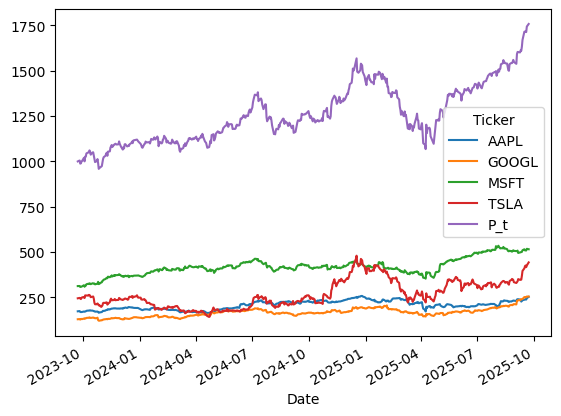

In [118]:
portfolio.plot()


Die prozentualen Potrtfolio-Renditen ergeben sich als gewichtete Summe der Aktienrenditen: 

Für die Portfolio-Rendite, also den prozentualen Zuwachs bis zum Zeitpunkt $t$ des Portfolios gilt dann wegen 


```{math}
:label: eq:weigthed-ret

\begin{aligned}
R^P_t &= \frac{P_t}{P_0}-1 = \sum\limits_{i=1}^n a_i \frac{S_{i,t}}{P_0} - 1 = \sum\limits_{i=1}^n a_i \frac{S_{i,0}}{P_0} \frac{S_{i,t}}{S_{i,0}} - 1 \\
&= \sum\limits_{i=1}^n w_i \left(\frac{S_{i,t}}{S_{i,0}} - 1 \right) = \sum\limits_{i=1}^n w_i R_{i,t} = R_t^T \cdot w, 
\end{aligned}
```


d. h. die Portfolio-Rendite ergibt sich als die gewichtete Summe der Aktien-Renditen $R_{i,t}=\frac{S_{i,t}}{S_{i,0}} - 1$ und kann bequem mittels Vektoren $R_t = (R_{1,t}, \ldots, R_{n,t})^T$ und Gewichtsvektor $\omega = (\omega_1, \ldots, \omega_n)^T$ auch als Matrix-Vektor Produkt geschrieben werden. Für die Log-Returns gilt dies nur näherungsweise, allerdings können wir diese einfach mit der Beziehung {eq}`rendite-vs-log-returns` berechnen.


Ticker          AAPL     GOOGL      MSFT      TSLA       P_t
Date                                                        
2023-09-22       NaN       NaN       NaN       NaN       NaN
2023-09-25  0.007381  0.006603  0.001672  0.008616  0.005111
2023-09-26 -0.023399 -0.019373 -0.017006 -0.011620 -0.017277
2023-09-27 -0.008897  0.015322  0.002082 -0.014829  0.001544
2023-09-28  0.001526  0.013559  0.002718  0.024449  0.010210


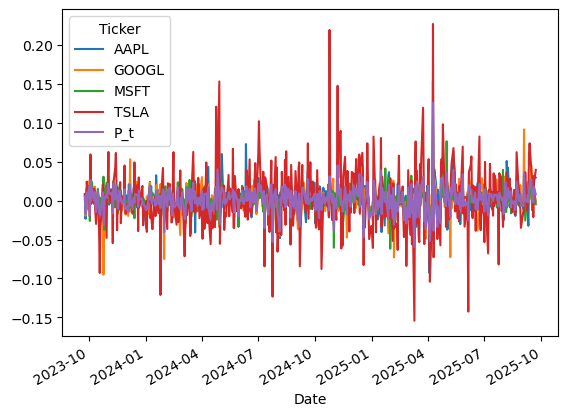

In [119]:
#daily returns / taegliche Renditen von t-1, t
#aktien_renditen = close_df.pct_change()
#print(aktien_renditen.head())

renditen_tag = portfolio.pct_change()
renditen_tag.plot()
print(renditen_tag.head())


In [120]:
#kumulierte Renditen von 0..t
renditen_kum=(1+renditen_tag).cumprod()-1
#haengen 0 an, da Portfoliogewicht, um die letzte Spalte (Portfoliowert) nicht zu beruecksichtigen
weights0 = np.append(weights,0)
print(weights0)

renditen_kum["check"] = renditen_kum.dot(weights0)
renditen_kum["PLog"] = np.log(renditen_kum.P_t+1)

print(renditen_kum.tail())


[0.1 0.3 0.4 0.2 0. ]
Ticker          AAPL     GOOGL      MSFT      TSLA       P_t     check  \
Date                                                                     
2025-09-16  0.375838  0.941592  0.629952  0.721741  0.716390  0.716390   
2025-09-17  0.380691  0.928991  0.633090  0.739056  0.717814  0.717814   
2025-09-18  0.374278  0.948317  0.628063  0.702262  0.713601  0.713601   
2025-09-19  0.418300  0.969112  0.658418  0.739913  0.743914  0.743914   
2025-09-22  0.460214  0.967566  0.650541  0.808641  0.758236  0.758236   

Ticker          PLog  
Date                  
2025-09-16  0.540224  
2025-09-17  0.541052  
2025-09-18  0.538597  
2025-09-19  0.556132  
2025-09-22  0.564311  


Wir sehen dass die beiden Spalten 'P_t', bei dem die Zuwachsraten von 0 bis t direkt aus den Portfoliowerten, und die Spalte 'check', 
bei dem die kumulierten Portfolio-Renditen als gewichtete Summe wie in Formel {eq}`eq:weigthed-ret` berechnet wurden, tatsächlich übereinstimmen. Ein Plot der kumulierten Returns aller einzelnen Aktien sowie des Portfolios zeigt die Diversifikationseffekte recht deutlich, denn die Volatilität der Tesla-Aktie, in die 20% investiert wurde, wird deutlich ausgeglättet, obwohl alle Renditen einen positiven Zusammenhang aufweisen.


<Axes: xlabel='Date'>

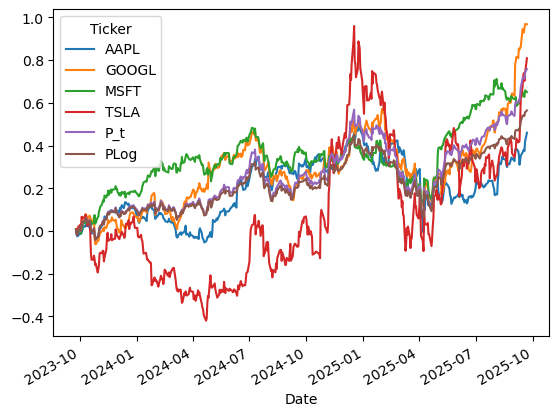

In [121]:

renditen_kum.drop(columns="check").plot()


(portfolio-momente)=
### Portfolioanalyse: erwartete Portfoliorendite und Portfoliovarianz

Wegen Formel {eq}`eq:weigthed-ret` können wir die erwartete Rendite sowie die Portfolio-Varianz einfach aus dem Zufalls-Vektor $R_t = (R_{1,t}, \ldots, R_{n,t})^T$ der Aktienrrenditen[^8] und seinen ersten beiden Momenten $\mu_t = \mathbb{E} R_t$ sowie $\Sigma_t = \operatorname(R_t) = \mathbb{E} \left( R_t - \mathbb{E} R_t \right) \left(R_t - \mathbb{E} R_t \right)^T$ ableiten

[^8]: Wir verwenden hier folgende Abkürzungen für die Renditen der i-ten Aktie: $R_{i,t} =  \frac{S_{i,t}}{S_{i,0}}-1$, die den prozentualen Zuwachs von 0 bis zum Zeitpunkt t darstellen.

\begin{align*}
\mathbb{E} R_t^P &= \mathbb{E} \left( R_t^T \cdot w \right) = \left( \mathbb{E} R_t^T \right) \cdot w = \mu_t^T \cdot w \\
\operatorname{Var} (R_t^P) &= \mathbb{E} \left( \left( R_t^T \cdot w  - \mathbb{E}(R_t^T \cdot w) \right)^T \left( R_t^T \cdot w  - \mathbb{E}(R_t^T \cdot w) \right) \right)\\
&= w^T \left\lbrace \mathbb{E} \left( R_t - \mathbb{E} R_t \right) \left(R_t - \mathbb{E} R_t \right)^T \right\rbrace w\\
&= w^T \Sigma_t w
\end{align*}

#### to-do: check!!!!

Üblicherweise werden wie in {ref}`annulized-ret` beschrieben aus den Tages-Log-Returns mit Hilfe des arithmetsichen Mittels die erwarteten Tages-Returns bzw. Renditen geschätzt sowie deren Kovarianzmatrix berechnet und  anschließend durch Skalierung annualisiert. Für die Renditen geht man ähnlich vor und nutzt den Zusammenhang ziwschen arithmetischen und geometrischen Mittel zur Annualisierung. Da wir streng genommen diese Annualisierung nur für die Log-Returns einfach berechnen können, kann man aber danach wieder zu den Renditen mittels Formel {eq}`rendite-vs-log-returns` übergehen. In der Praxis wird das nicht immer so konsequent unterschieden, aber wir haben ja gesehen, dass die Unterschiede zwischen Log-Returns und Renditen nicht so deutlich sind und daher der Approximationsfehler in Formel {eq}`eq:rendite-annualized-approx` nicht wesentlich ausfällt.

In [122]:
#to do codebeispiel
#log_returns = np.log(renditen + 1)
#mu = log_returns.mean()

In [123]:
mu_tilde = renditen.mean()
geo_mean_renditen = np.exp((np.log(renditen+1)).mean()) - 1

print("mean daily R %s: \n " % mu_tilde)
print("geometric mean daily R %s: \n" % geo_mean_renditen)
print("check: geo mean Rendite = exp(mean daily log)-1 = %s \n" % (np.exp(mu)-1) )
print("Daily log-returns %s: \n" % mu)

mean daily R Ticker
AAPL     0.000909
GOOGL    0.001535
MSFT     0.001102
TSLA     0.001967
dtype: float64: 
 
geometric mean daily R Ticker
AAPL     0.000757
GOOGL    0.001355
MSFT     0.001003
TSLA     0.001186
dtype: float64: 

check: geo mean Rendite = exp(mean daily log)-1 = Ticker
AAPL     0.000757
GOOGL    0.001355
MSFT     0.001003
TSLA     0.001186
dtype: float64 

Daily log-returns Ticker
AAPL     0.000757
GOOGL    0.001354
MSFT     0.001002
TSLA     0.001185
dtype: float64: 



Wir sehen Abweichungen zwischen den geometrischen und arithmetischen Mittelwerten der täglichen Renditen bzw. Log-Returns. 
Außerdem sehen wir den den nichtlineare Zusammenhang zwischen mittleren Log-Returns und geometrischen Mittel der Renditen. Nun werden diese Mittel annualisiert. 

In [124]:
#annualization: from daily means to yearly means
trading_days = 252

mu_year = mu * trading_days

mu_tilde_year  = (mu_tilde+1) ** trading_days - 1

mu_tilde_year_approx1 = mu_tilde * trading_days 
mu_tilde_year_approx2 = np.exp(mu_year) -1
#mu_tilde_year_approx3 = mu_year


print("mu year (Log-Returns r) %s: \n " % mu_year)
print("mu_tilde year (Renditen R) %s: \n " % mu_tilde_year)
print("Approximation1 : mu_tilde_year = mu_tilde * trading days %s\n " % (mu_tilde_year_approx1))
print("Approximation2: exp(mu_year) -1  %s: \n" % (mu_tilde_year_approx2))


mu year (Log-Returns r) Ticker
AAPL     0.190806
GOOGL    0.341106
MSFT     0.252556
TSLA     0.298658
dtype: float64: 
 
mu_tilde year (Renditen R) Ticker
AAPL     0.257437
GOOGL    0.471891
MSFT     0.319778
TSLA     0.640700
dtype: float64: 
 
Approximation1 : mu_tilde_year = mu_tilde * trading days Ticker
AAPL     0.229179
GOOGL    0.386845
MSFT     0.277616
TSLA     0.495610
dtype: float64
 
Approximation2: exp(mu_year) -1  Ticker
AAPL     0.210224
GOOGL    0.406502
MSFT     0.287312
TSLA     0.348049
dtype: float64: 



 Die Auswirkungen auf die **erwartete** jährliche Portfoliorendite je nach Berechnungsart:

In [125]:
print("erwartete annualisierte Portfoliorendite: \n"
"  %f (mu_tilde_year -- correct) \n"
"  %f (mu_year) \n"
"  %f (Approx1) \n"
"  %f (Approx2) \n" % 
      (mu_tilde_year.dot(weights),mu_year.dot(weights), mu_tilde_year_approx1.dot(weights), mu_tilde_year_approx2.dot(weights)))

erwartete annualisierte Portfoliorendite: 
  0.423362 (mu_tilde_year -- correct) 
  0.282166 (mu_year) 
  0.349140 (Approx1) 
  0.327507 (Approx2) 



Obwohl die 2. Approximation bessere Ergebnisse liefert, werden wir aus Gründen der Einfachheit die simplere 1. Approximation für die Berechnung der Kovarianzmatrix der Jahres-Renditen $\tilde{\Sigma}_\text{annualized} \approx 252 \cdot \tilde{\Sigma}_text{daily}$ verwenden.

to do!!!

In [126]:
Sigma_day = log_returns.cov()
Sigma_year = Sigma_day * trading_days 

Sigma_tilde_day = renditen.cov()

#Dummy zur simultanen Berechnung von (mu_tilde_i + 1)(mu_tilde_j + 1)
mu_tilde_dummy = np.outer(mu_tilde + 1, mu_tilde + 1)
#print(mu_tilde_dummy)

Sigma_tilde_year = (Sigma_tilde_day + mu_tilde_dummy)**trading_days - mu_tilde_dummy**trading_days

Sigma_tilde_year_approx1 = Sigma_year
Sigma_tilde_year_approx2 = Sigma_tilde_day * trading_days


print("Annualized covarince R (percentege changes)")
print(Sigma_tilde_year)

print("Approx1: Annualized covarince R (percentege changes): Sigma \approx Sigma_tilde")
print(Sigma_tilde_year_approx1)

print("Approx2: Annualized covarince R (percentege changes): yearly cov = daily cov * 252")
print(Sigma_tilde_year_approx2)


print("Annualized covariance r (log retunrs)")
print(Sigma_year)


Annualized covarince R (percentege changes)
Ticker      AAPL     GOOGL      MSFT      TSLA
Ticker                                        
AAPL    0.127171  0.072264  0.053833  0.172102
GOOGL   0.072264  0.206212  0.068472  0.183769
MSFT    0.053833  0.068472  0.089462  0.117522
TSLA    0.172102  0.183769  0.117522  1.315759
Approx1: Annualized covarince R (percentege changes): Sigma pprox Sigma_tilde
Ticker      AAPL     GOOGL      MSFT      TSLA
Ticker                                        
AAPL    0.076407  0.037915  0.031369  0.078739
GOOGL   0.037915  0.091169  0.034451  0.072941
MSFT    0.031369  0.034451  0.049841  0.052181
TSLA    0.078739  0.072941  0.052181  0.392003
Approx2: Annualized covarince R (percentege changes): yearly cov = daily cov * 252
Ticker      AAPL     GOOGL      MSFT      TSLA
Ticker                                        
AAPL    0.077511  0.038398  0.031990  0.080366
GOOGL   0.038398  0.091218  0.034735  0.073608
MSFT    0.031990  0.034735  0.050201  0.05

Portvoliovarianz exakt berechnet:

In [127]:
P_var_year = (Sigma_tilde_year.dot(weights)).dot(weights)
print(P_var_year)

#alternative Berechnung mittels matmult
print(np.matmul(weights.transpose(), np.matmul(Sigma_tilde_year, weights)))




0.15959095681636107
0.15959095681636107


In [128]:
P_var_year_approx1 = (Sigma_tilde_year_approx1.dot(weights)).dot(weights)
P_var_year_approx2 = (Sigma_tilde_year_approx2.dot(weights)).dot(weights)

In [129]:
print("annualisierte Portfolio-Varianz: \n"
"  %f (korrekt) \n"
"  %f (Approx1) \n"
"  %f (Approx2) \n" % 
      (P_var_year, P_var_year_approx1, P_var_year_approx2 ))

annualisierte Portfolio-Varianz: 
  0.159591 (korrekt) 
  0.065928 (Approx1) 
  0.066741 (Approx2) 

